In [2]:
import pandas as pd
import torch
import torchvision

# Reading the dataset
df = pd.read_csv('dataset.csv')

In [3]:
# printing the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [4]:
# Main Statistics of dataframe
df.describe()

,f3,target
count,766.000000,766.000000
mean,69.118799,0.349869
std,19.376901,0.477240
min,0.000000,0.000000
25%,62.500000,0.000000
50%,72.000000,0.000000
75%,80.000000,1.000000
max,122.000000,1.000000


In [5]:
df.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

In [6]:
type(df)
# Data types of the features in the dataset
df.dtypes

f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object

In [7]:
df.shape

(766, 8)

In [8]:
# Convert the features to numeric values
df = df.apply( pd.to_numeric, errors='coerce' )

In [9]:
df.dtypes

# Dropping the NA values
df.dropna(inplace=True)

In [844]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.834211,120.969737,69.119737,20.507895,80.234211,31.998684,0.473250,0.350000
std,3.364762,32.023301,19.446088,15.958029,115.581444,7.899724,0.332277,0.477284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


In [10]:
def removing_outliers(data, col):
    for column in col:
        Q1=data[column].quantile(0.25)
        Q3=data[column].quantile(0.75)
        
        IQR = Q3-Q1
        lower = Q1-1.5*IQR
        upper = Q3+1.5*IQR
        data = data[(data[column]>=lower) & (data[column]<=upper)]
    return data

In [11]:
number_columns = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']

df = removing_outliers(df, number_columns)
print(df)

      f1     f2  f3    f4     f5    f6     f7  target
0    6.0  148.0  72  35.0    0.0  33.6  0.627       1
1    1.0   85.0  66  29.0    0.0  26.6  0.351       0
2    8.0  183.0  64   0.0    0.0  23.3  0.672       1
3    1.0   89.0  66  23.0   94.0  28.1  0.167       0
5    5.0  116.0  74   0.0    0.0  25.6  0.201       0
..   ...    ...  ..   ...    ...   ...    ...     ...
755  1.0  128.0  88  39.0  110.0  36.5  1.057       1
756  7.0  137.0  90  41.0    0.0  32.0  0.391       0
757  0.0  123.0  72   0.0    0.0  36.3  0.258       1
758  1.0  106.0  76   0.0    0.0  37.5  0.197       0
759  6.0  190.0  92   0.0    0.0  35.5  0.278       1

[639 rows x 8 columns]


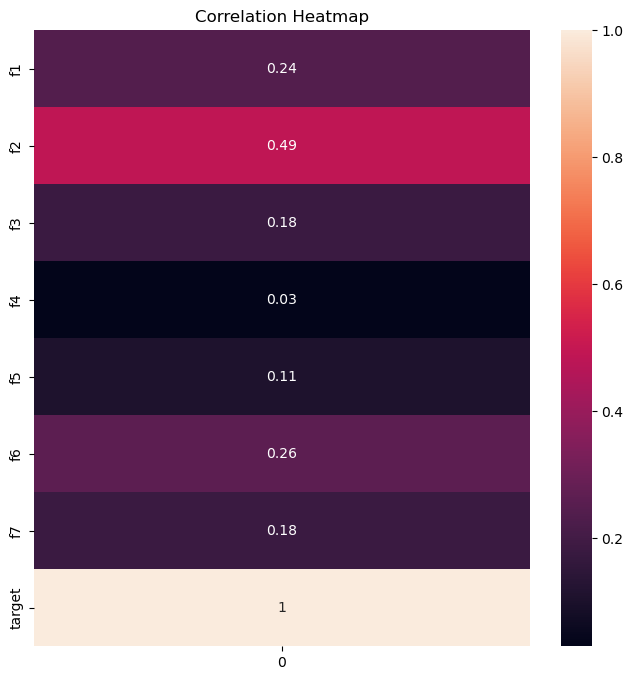

In [847]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cf = df.corrwith(df['target'])
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(np.asarray(cf).reshape(-1,1), annot=True)
heatmap.set_yticklabels(df.columns)
plt.title('Correlation Heatmap')
plt.show()

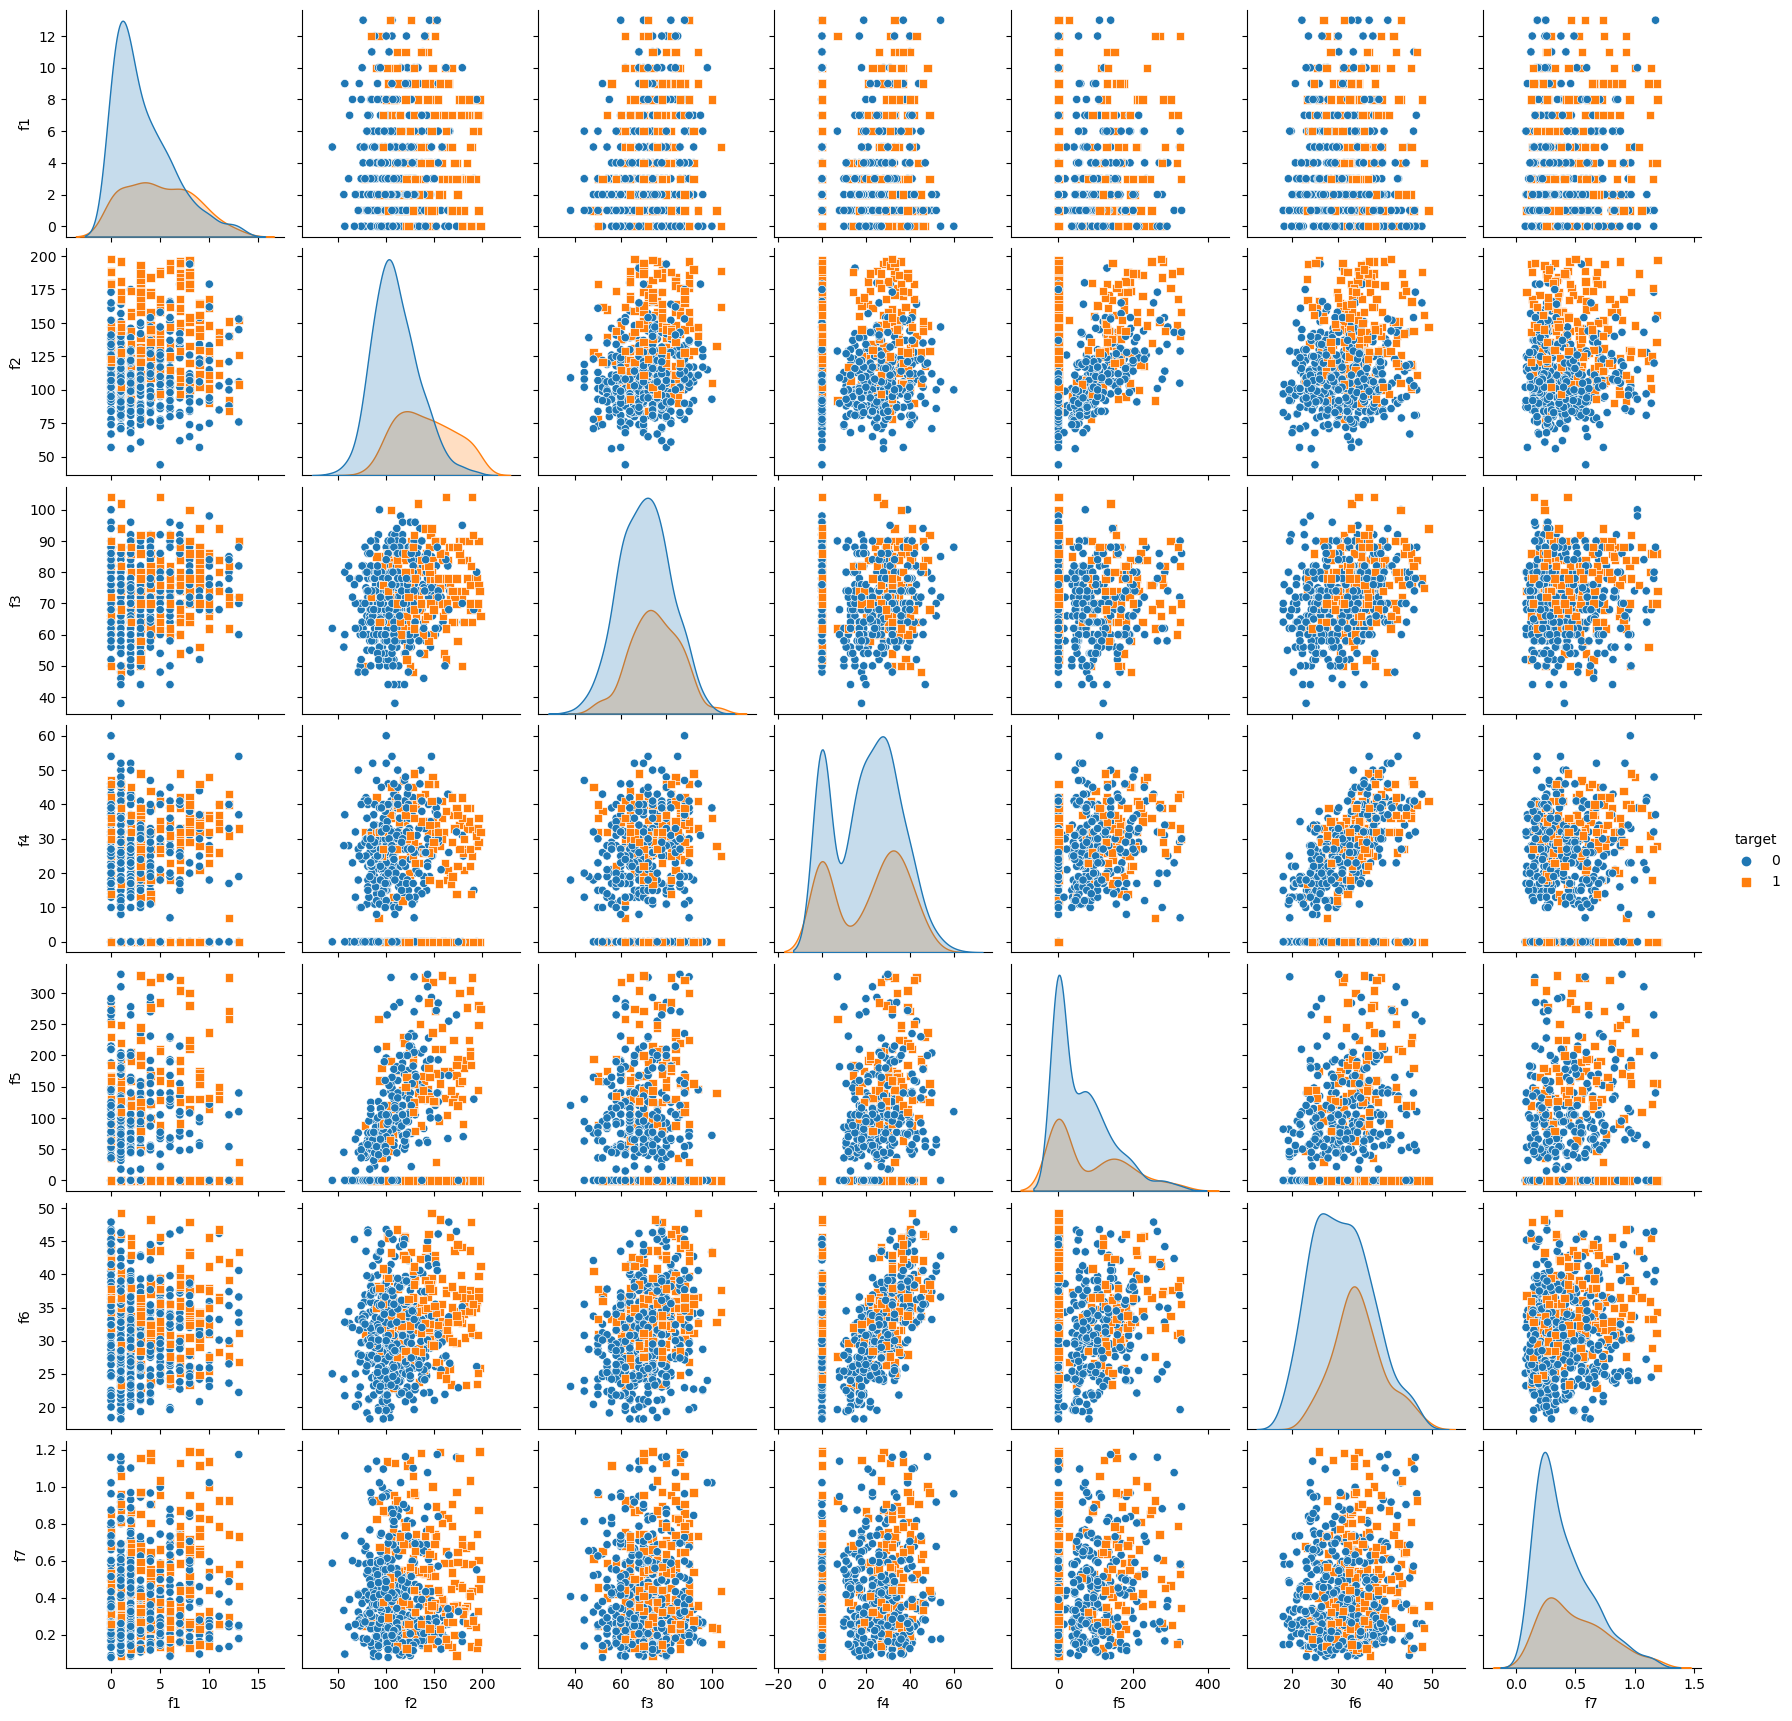

In [848]:
sns.pairplot(df, hue='target', markers=['o', 's'])
plt.show()

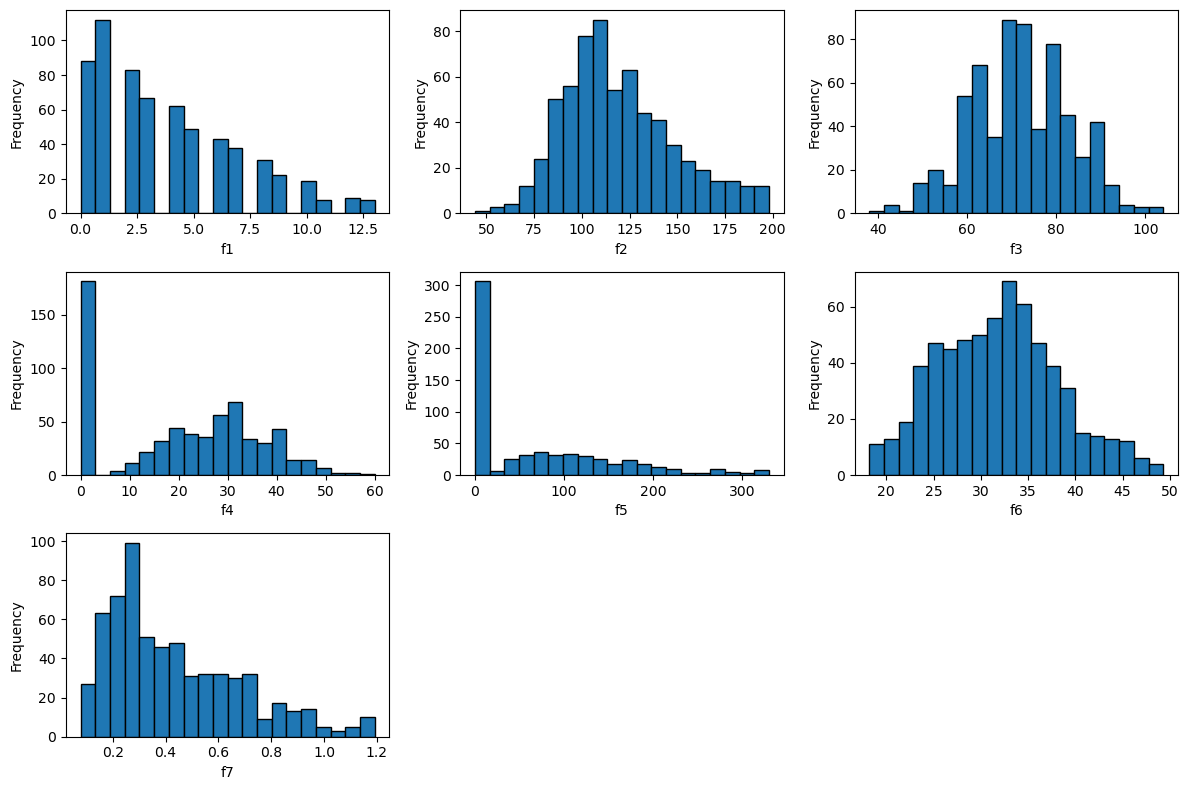

In [849]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [13]:
df

,f1,f2,f3,f4,f5,f6,f7,target
0,0.677583,0.971687,-0.007174,0.957009,-0.820582,0.270402,0.769702,1
1,-0.866552,-1.173367,-0.546456,0.564416,-0.820582,-0.835587,-0.328074,0
2,1.295236,2.163385,-0.726217,-1.333115,-0.820582,-1.356982,0.948687,1
3,-0.866552,-1.037174,-0.546456,0.171823,0.308296,-0.598589,-1.059925,0
5,0.368756,-0.117864,0.172587,-1.333115,-0.820582,-0.993586,-0.924692,0
...,...,...,...,...,...,...,...,...
755,-0.866552,0.290718,1.430913,1.218737,0.500446,0.728598,2.480005,1
756,0.986409,0.597154,1.610674,1.349601,-0.820582,0.017605,-0.168976,0
757,-1.175379,0.120475,-0.007174,-1.333115,-0.820582,0.696998,-0.697977,1
758,-0.866552,-0.458349,0.352348,-1.333115,-0.820582,0.886597,-0.940601,0


In [14]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'target' is your target variable
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Split data into 80% training and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary data into 50% validation and 50% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
pip install torchinfo

Note: you may need to restart the kernel to use updated packages.


In [853]:
from torch.nn.modules import dropout
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim

# Define the neural network
class NN(nn.Module):
    def __init__(self, input, hidden, output, hls=3, dprob=0.3):
        super(NN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input, hidden))
        for _ in range(hls - 1):
            self.hidden_layers.append(nn.Linear(hidden, hidden))
        self.output_layer = nn.Linear(hidden, output)
        self.dropout = nn.Dropout(dprob)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = F.leaky_relu(layer(x))
            x = self.dropout(x)
        x = self.output_layer(x)
        return torch.sigmoid(x)

# 7 features that we have
input = 7
hidden = 128  # Node in middle hidden layes
output = 1  # we have to predict either 0 or 1 and so only one output

# Instantiate the model
model = NN(input, hidden, output, hls=1,dprob=0.142)

# Print model summary
print(summary(model, input=(1, input)))

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.044, momentum = 0.335)

Layer (type:depth-idx)                   Param #
NN                                       --
├─ModuleList: 1-1                        --
│    └─Linear: 2-1                       1,024
├─Linear: 1-2                            129
├─Dropout: 1-3                           --
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0


## **Step 3**


**NN Architecture:**

**Input Neurons**: 7 input neurons (corresponding to the 7 features).

**Output Neurons**: 1 output neuron (for binary classification, predicting either 0 or 1).

**Activation Function for Hidden Layers**: Rectified Linear Unit (ReLU) activation function is used for the hidden layers. ReLU is a common choice for hidden layers in deep neural networks.

**Activation Function for Output Layer**: Sigmoid activation function is used for the output layer. Sigmoid squashes the output between 0 and 1, which is suitable for binary classification tasks where the output represents probabilities.

**Number of Hidden Layers**: 5 hidden layers are used in this architecture.

**Size of Each Hidden Layer**: Each hidden layer contains 128 nodes. This means there are 5 hidden layers, each with 128 nodes.

**Dropout**: Dropout regularization with a dropout probability of 0.3 is included. Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of input units to 0 during training.


**Model Summary using Torchinfo Package:**

The provided code above already prints the summary of the model using the Torchinfo package.

The architecture specified includes 7 input neurons, 1 output neuron, ReLU activation for hidden layers, Sigmoid activation for the output layer, 5 hidden layers each with 128 nodes, and dropout regularization with a dropout probability of 0.3.

In [854]:
# Number of epochs and batch size
epochs = 5
batch_size = 64

tas = []  # Training accuracies
vas = []  # Validation accuracies
testas = []  # Test accuracies

tl = []  # Training Losses
vl = []  # Validation Losses
testl = []  # Test Losses

for epoch in range(epochs):
    # Training phase
    model.train()  # Set the model to training mode
    total_loss = 0
    correct_train = 0
    total_train = 0

    # Iterate over batches of the training data
    for i in range(0, len(X_train), batch_size):
        # Extract current batch
        batch_features = torch.tensor(X_train[i:i + batch_size].values, dtype=torch.float32)
        batch_labels = torch.tensor(y_train[i:i + batch_size].values, dtype=torch.float32)
        # Clear gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(batch_features)
        # Compute the loss
        loss = criterion(outputs.squeeze(), batch_labels)
        # Backpropagation
        loss.backward()
        # Update weights
        optimizer.step()
        total_loss += loss.item() * batch_features.size(0)  # Accumulate the total loss

        # Calculate training accuracy
        predicted = torch.round(outputs.squeeze())  # Round to 0 or 1
        correct_train += (predicted == batch_labels).sum().item()
        total_train += batch_labels.size(0)

    # Calculate average training loss and accuracy for this epoch
    train_loss = total_loss / len(X_train)
    train_accuracy = correct_train / total_train
    tas.append(train_accuracy)
    tl.append(train_loss)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    correct_val = 0
    total_val = 0

    # Iterate over batches of the validation data
    with torch.no_grad():  # Disable gradient computation during validation
        for i in range(0, len(X_val), batch_size):
            # Extract current batch
            batch_features = torch.tensor(X_val[i:i + batch_size].values, dtype=torch.float32)
            batch_labels = torch.tensor(y_val[i:i + batch_size].values, dtype=torch.float32)
            # Forward pass
            outputs = model(batch_features)
            # Compute the loss
            loss = criterion(outputs.squeeze(), batch_labels)
            val_loss += loss.item() * batch_features.size(0)  # Accumulate the total loss

            # Calculate validation accuracy
            predicted = torch.round(outputs.squeeze())  # Round to 0 or 1
            correct_val += (predicted == batch_labels).sum().item()
            total_val += batch_labels.size(0)

    # Calculate average validation loss and accuracy for this epoch
    val_loss = val_loss / len(X_val)
    val_accuracy = correct_val / total_val
    vas.append(val_accuracy)
    vl.append(val_loss)
    # Iterate over batches of the testing data

    # Print training, validation, and accuracy for this epoch
    print(f'Epoch {epoch + 1}/{epochs}, '
          f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Training, validation, and testing complete
print('Finished Training, Validation, and Testing')

Epoch 1/5, Training Loss: 0.6400, Training Accuracy: 0.6614, Validation Loss: 0.5873, Validation Accuracy: 0.6875
Epoch 2/5, Training Loss: 0.5617, Training Accuracy: 0.7319, Validation Loss: 0.5517, Validation Accuracy: 0.7188
Epoch 3/5, Training Loss: 0.5299, Training Accuracy: 0.7515, Validation Loss: 0.5339, Validation Accuracy: 0.7188
Epoch 4/5, Training Loss: 0.5030, Training Accuracy: 0.7691, Validation Loss: 0.5246, Validation Accuracy: 0.7031
Epoch 5/5, Training Loss: 0.4878, Training Accuracy: 0.7867, Validation Loss: 0.5201, Validation Accuracy: 0.6875
Finished Training, Validation, and Testing


In [855]:
# Testing phase
model.eval()  # Set the model to evaluation mode
test_loss = 0
correct_test = 0
total_test = 0 

# Measure time to evaluate
start_time = time.time()

with torch.no_grad():  # Disable gradient computation during testing
    for i in range(0, len(X_test), batch_size):
        # Extract current batch
        batch_features = torch.tensor(X_test[i:i + batch_size].values, dtype=torch.float32)
        batch_labels = torch.tensor(y_test[i:i + batch_size].values, dtype=torch.float32)

        # Forward pass
        outputs = model(batch_features)

        # Compute the loss
        loss = criterion(outputs.squeeze(), batch_labels)

        test_loss += loss.item() * batch_features.size(0)  # Accumulate the total loss

        # Calculate test accuracy
        predicted = torch.round(outputs.squeeze())  # Round to 0 or 1
        correct_test += (predicted == batch_labels).sum().item()
        total_test += batch_labels.size(0)

# Calculate average test loss and accuracy for this epoch
test_loss = test_loss / len(X_test)
test_accuracy = correct_test / total_test
testas.append(test_accuracy)
testl.append(test_loss)  

print(f'Training Loss: {test_loss:.4f}, Training Accuracy: {test_accuracy:.4f}')

# Calculate time taken to evaluate
evaluation_time = time.time() - start_time

# Calculate accuracy
accuracy = accuracy_score(test_targets, test_predictions)
# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(test_targets, test_predictions, average='binary')

# Print evaluation results
print(f'Time to Evaluate: {evaluation_time:.2f} seconds')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Training Loss: 0.4733, Training Accuracy: 0.8125
Time to Evaluate: 0.00 seconds
Accuracy: 0.7969
Precision: 0.7857
Recall: 0.5238
F1 Score: 0.6286


In [857]:
import torch
import seaborn as sns
# Assuming 'model' is your trained PyTorch model
# Save the model to a file
torch.save(model.state_dict(), 'model.h5')

# 'model.pth' is the file name where your model will be saved

In [858]:
len(tas),len(vas),len(test_accuracies),len(tl),len(vl),len(test_losses)

(5, 5, 1, 5, 5, 1)

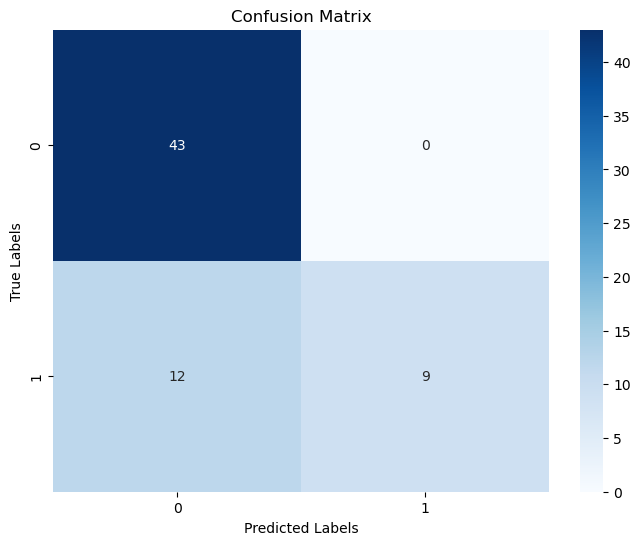

In [859]:
conf_matrix = confusion_matrix(test_targets, test_predictions)

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')  # 'class_names' is a list of class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

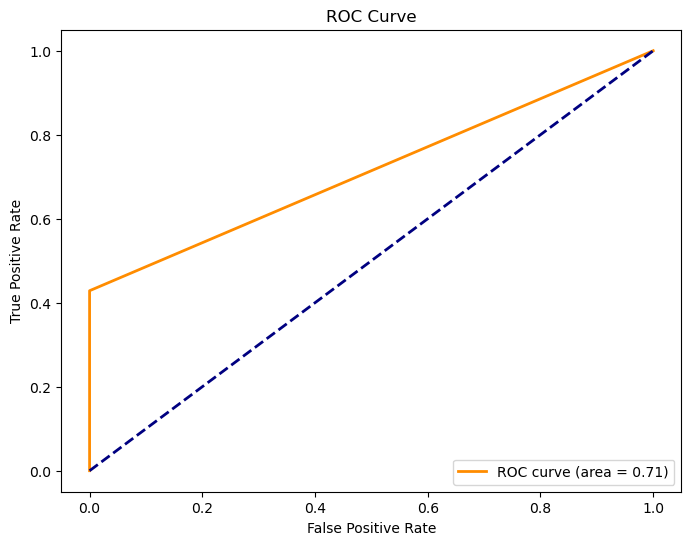

In [860]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_targets, test_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# AUC-ROC = 0.5: A model with an AUC-ROC of 0.5 is essentially random guessing.
# It has no discriminatory power between positive and negative classes.
# The ROC curve coincides with the diagonal line (the line of no-discrimination).

# AUC-ROC > 0.5: A model with an AUC-ROC greater than 0.5 indicates that the model has some discriminatory power.
# The higher the AUC-ROC, the better the model is at distinguishing between positive and negative classes.
# A perfect model would have an AUC-ROC of 1.0.

# AUC-ROC = 1.0: A model with an AUC-ROC of 1.0 represents a perfect classifier.
# It achieves a TPR of 1.0 (sensitivity) and an FPR of 0.0,
# meaning it perfectly separates the positive and negative classes without any false positives or false negatives.

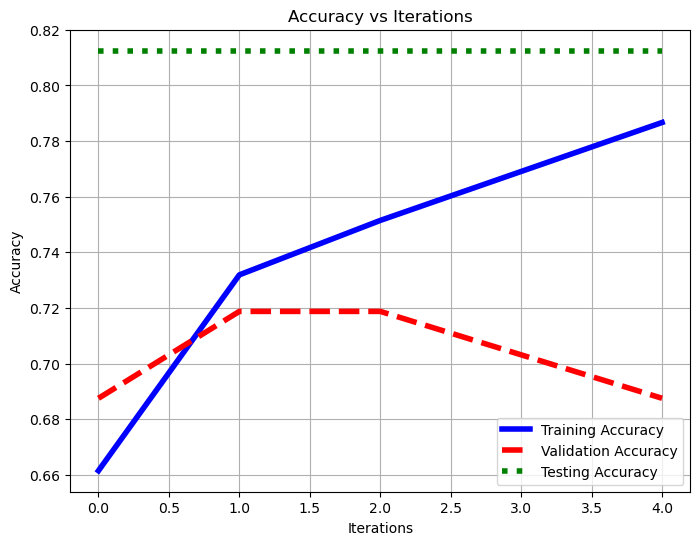

In [861]:
import matplotlib.pyplot as plt
x= [i for i in range(0,5)]

plt.figure(figsize=(8, 6))
plt.plot(x, tas, color='blue', linestyle='-', label='Training Accuracy',linewidth=4)
plt.plot(x, vas, color='red', linestyle='--', label='Validation Accuracy',linewidth=4)
plt.plot(x, test_accuracies*len(vas) , color='green', linestyle=':', label='Testing Accuracy',linewidth=4)

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations')
plt.legend()
plt.grid(True)

plt.show()

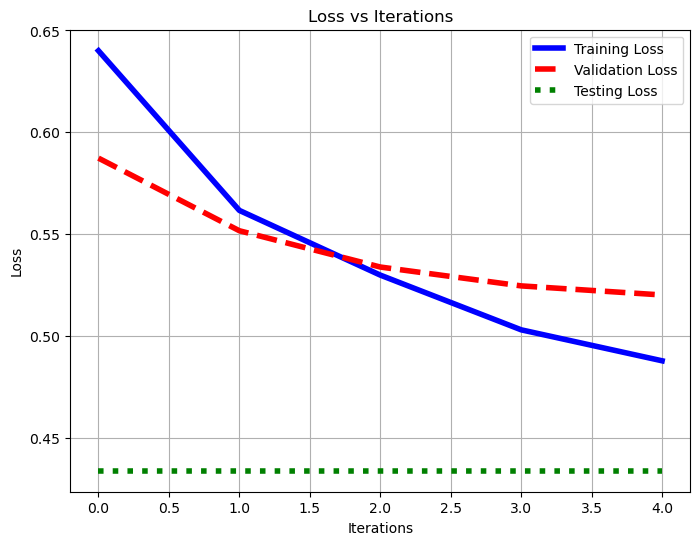

In [862]:
import matplotlib.pyplot as plt
x= [i for i in range(0,5)]

plt.figure(figsize=(8, 6))
plt.plot(x, tl, color='blue', linestyle='-', label='Training Loss',linewidth=4)
plt.plot(x, vl, color='red', linestyle='--', label='Validation Loss',linewidth=4)
plt.plot(x, test_losses*len(vl) , color='green', linestyle=':', label='Testing Loss',linewidth=4)

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.legend()
plt.grid(True)

plt.show()

# Optimizing NN
DropOut

In [864]:
from torch.nn.modules import dropout
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim

# Define the neural network
class NN(nn.Module):
    def __init__(self, dropout_rate=0.142, lr = 0.044, optimizer_name='SGD', activation_function='ReLU'):
        super(NN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(7, 128))
        self.output_layer = nn.Linear(128, 1)
        self.dropout = nn.Dropout(dropout_rate)
        
         # Activation function
        if activation_function == 'ReLU':
            self.activation = nn.ReLU()
        elif activation_function == 'Sigmoid':
            self.activation = nn.Sigmoid()
        elif activation_function == 'Tanh':
            self.activation = nn.Tanh()
        elif activation_function == 'LeakyReLU':
            self.activation = nn.LeakyReLU()
        else:
            raise ValueError("Invalid activation function")

        # Choose optimizer
        if optimizer_name == 'Adam':
            self.optimizer = optim.Adam(self.parameters(), lr=lr)
        elif optimizer_name == 'SGD':
            self.optimizer = optim.SGD(self.parameters(), lr=lr, momentum = 0.335)
        elif optimizer_name == 'RMSprop':
            self.optimizer = optim.RMSprop(self.parameters(), lr=lr)
        elif optimizer_name == 'Adagrad':
            self.optimizer = optim.Adagrad(self.parameters(), lr=lr)
        else:
            raise ValueError("Invalid optimizer")


    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.dropout(self.activation(layer(x)))            
        x = self.output_layer(x)
        return torch.sigmoid(x)

In [865]:

def train_model(model, optimizer, model_name):
    # Number of epochs and batch size
    epochs = 5
    batch_size = 64
    
    # Define the loss function (Binary Cross Entropy Loss for binary classification)
    criterion = nn.BCELoss()

    tas = []  # Training accuracies
    vas = []  # Validation accuracies
    testas = []  # Test accuracies

    tl = []  # Training Losses
    vl = []  # Validation Losses

    for epoch in range(epochs):
        # Training phase
        model.train()  # Set the model to training mode
        total_loss = 0
        correct_train = 0
        total_train = 0

        # Iterate over batches of the training data
        for i in range(0, len(X_train), batch_size):
            # Extract current batch
            batch_features = torch.tensor(X_train[i:i + batch_size].values, dtype=torch.float32)
            batch_labels = torch.tensor(y_train[i:i + batch_size].values, dtype=torch.float32)
            # Clear gradients
            optimizer.zero_grad()
            # Forward pass
            outputs = model(batch_features)
            # Compute the loss
            loss = criterion(outputs.squeeze(), batch_labels)
            # Backpropagation
            loss.backward()
            # Update weights
            optimizer.step()
            total_loss += loss.item() * batch_features.size(0)  # Accumulate the total loss
            # Calculate training accuracy
            predicted = torch.round(outputs.squeeze())  # Round to 0 or 1
            correct_train += (predicted == batch_labels).sum().item()
            total_train += batch_labels.size(0)

        # Calculate average training loss and accuracy for this epoch
        train_loss = total_loss / len(X_train)
        train_accuracy = correct_train / total_train
        tas.append(train_accuracy)
        tl.append(train_loss)

        # Validation phase
        model.eval()  # Set the model to evaluation mode
        val_loss = 0
        correct_val = 0
        total_val = 0

        # Iterate over batches of the validation data
        with torch.no_grad():  # Disable gradient computation during validation
            for i in range(0, len(X_val), batch_size):
                # Extract current batch
                batch_features = torch.tensor(X_val[i:i + batch_size].values, dtype=torch.float32)
                batch_labels = torch.tensor(y_val[i:i + batch_size].values, dtype=torch.float32)
                # Forward pass
                outputs = model(batch_features)
                # Compute the loss
                loss = criterion(outputs.squeeze(), batch_labels)
                val_loss += loss.item() * batch_features.size(0)  # Accumulate the total loss
                # Calculate validation accuracy
                predicted = torch.round(outputs.squeeze())  # Round to 0 or 1
                correct_val += (predicted == batch_labels).sum().item()
                total_val += batch_labels.size(0)

        # Calculate average validation loss and accuracy for this epoch
        val_loss = val_loss / len(X_val)
        val_accuracy = correct_val / total_val
        vas.append(val_accuracy)
        vl.append(val_loss)        
               
    # Save the model to a file
    torch.save(model.state_dict(), f'model{model_name}.h5')  
    torch.save(model, f'full_model{model_name}.h5')
  
    model.eval()  # Set the model to evaluation mode
    test_predictions = []
    test_targets = []
    test_accuracies = []  # List to store accuracy for each batch
    test_losses = []

    with torch.no_grad():  
        for i in range(0, len(X_test), batch_size):
            # Extract current batch
            batch_features = torch.tensor(X_test[i:i + batch_size].values, dtype=torch.float32)
            batch_labels = torch.tensor(y_test[i:i + batch_size].values, dtype=torch.float32)

            # Forward pass
            outputs = model(batch_features)
            predictions = torch.round(outputs.squeeze())

            # Calculate loss for this batch
            batch_loss = criterion(outputs.squeeze(), batch_labels)
            test_losses.append(batch_loss.item()) 

            batch_accuracy = torch.sum(predictions == batch_labels).item() / batch_size
            test_accuracies.append(batch_accuracy)

            # Append predictions and targets for evaluation
            test_predictions.extend(predictions.tolist())
            test_targets.extend(batch_labels.tolist())

    # Calculate accuracy
    accuracy = accuracy_score(test_targets, test_predictions)

    return(accuracy, test_predictions, test_targets, test_losses, tas, vas, tl, vl, test_accuracies)


In [866]:
 def plots(test_predictions, test_targets, test_losses, tas, vas, tl, vl, test_accuracies):
    #Confusion Matrix
    conf_matrix = confusion_matrix(test_targets, test_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')  # 'class_names' is a list of class labels
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    #Roc curve
    fpr, tpr, thresholds = roc_curve(test_targets, test_predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    #Accuracy graph
    x= [i for i in range(0,5)]
    plt.figure(figsize=(8, 6))
    plt.plot(x, tas, color='blue', linestyle='-', label='Training Accuracy',linewidth=4)
    plt.plot(x, vas, color='red', linestyle='--', label='Validation Accuracy',linewidth=4)
    plt.plot(x, test_accuracies*len(vas) , color='green', linestyle=':', label='Testing Accuracy',linewidth=4)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()
   
    #Loss Graph
    x= [i for i in range(0,5)]
    plt.figure(figsize=(8, 6))
    plt.plot(x, tl, color='blue', linestyle='-', label='Training Loss')
    plt.plot(x, vl, color='red', linestyle='--', label='Validation Loss')
    plt.plot(x, test_losses*len(vl) , color='green', linestyle=':', label='Testing Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss vs Iterations')
    plt.legend() 
    plt.grid(True)
    plt.show()

Plots for Model_0.1: Dropout=0.1, Activation Function=ReLU, Optimizer=SGD, Accuracy=0.828125


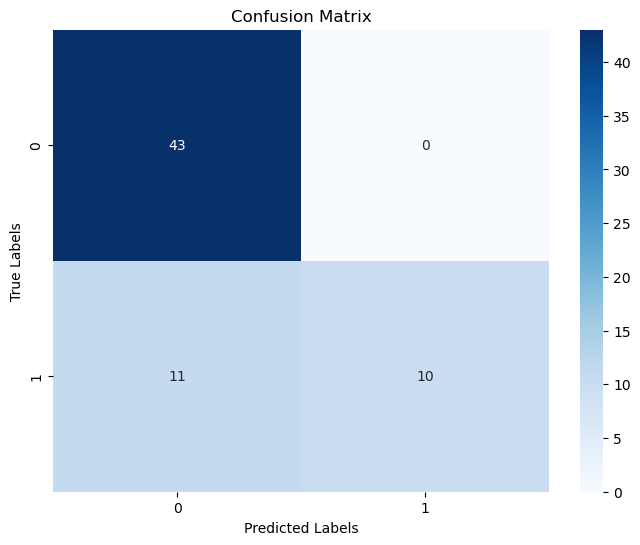

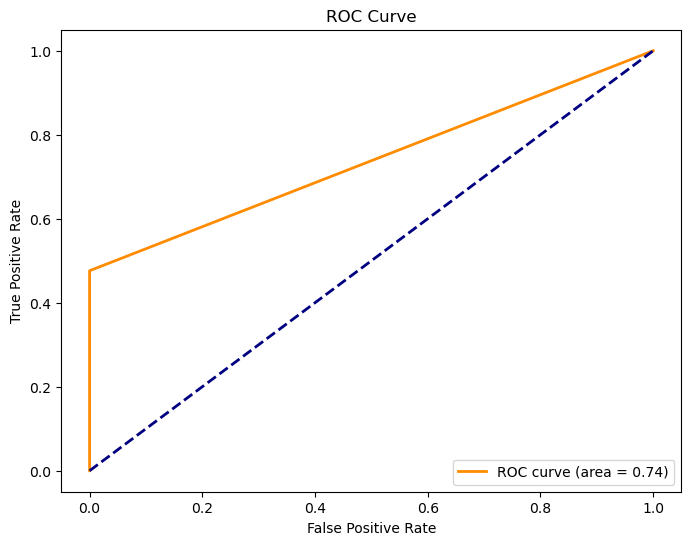

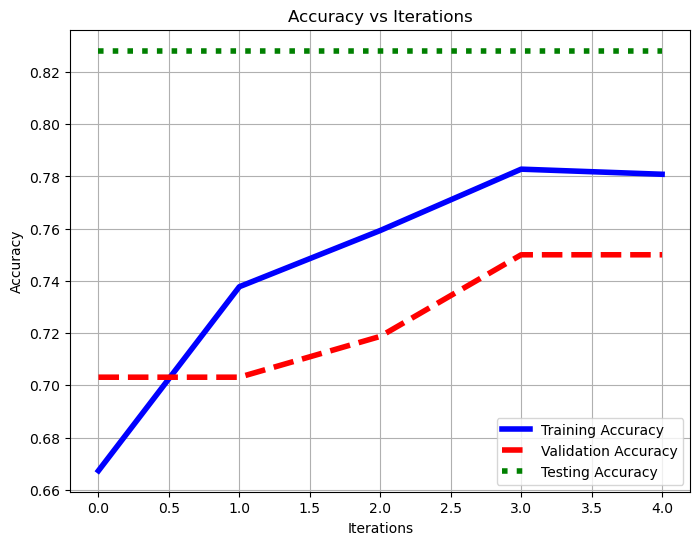

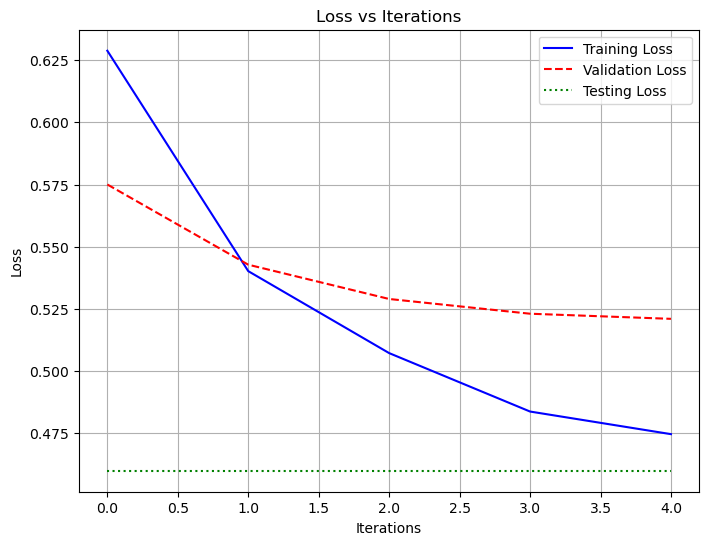

Plots for Model_0.5: Dropout=0.5, Activation Function=ReLU, Optimizer=SGD, Accuracy=0.78125


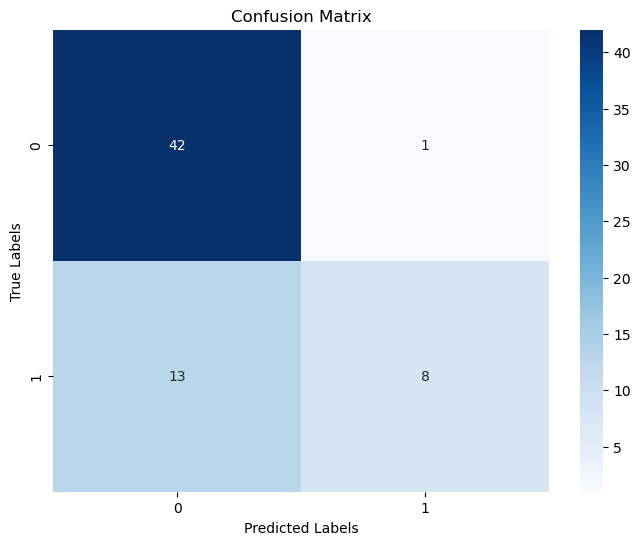

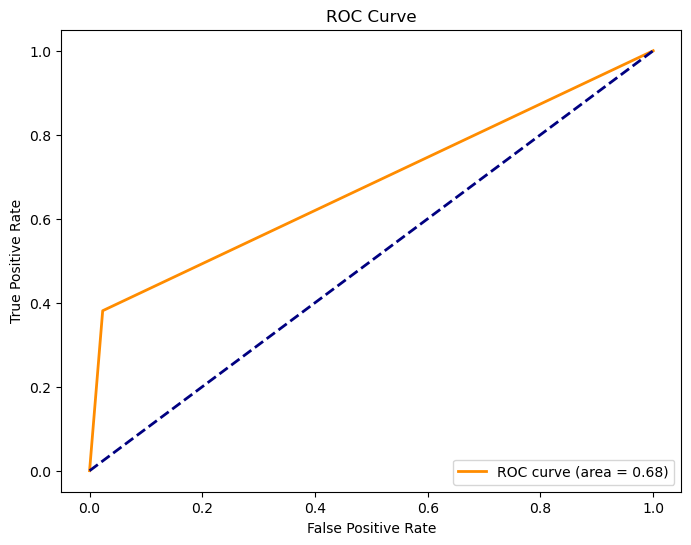

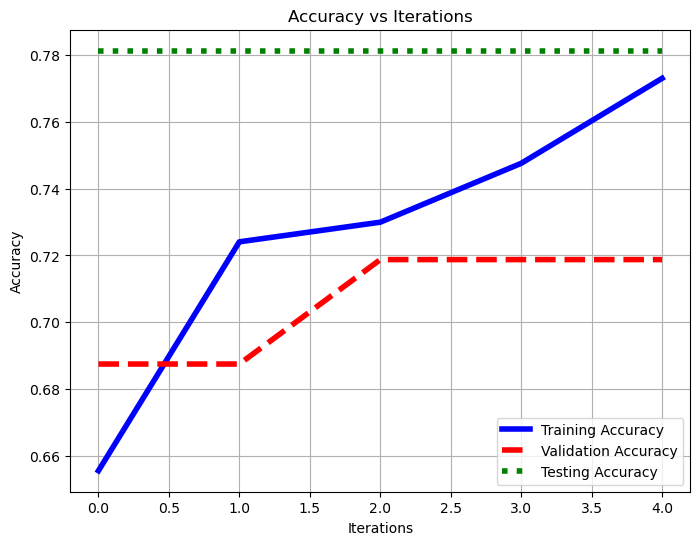

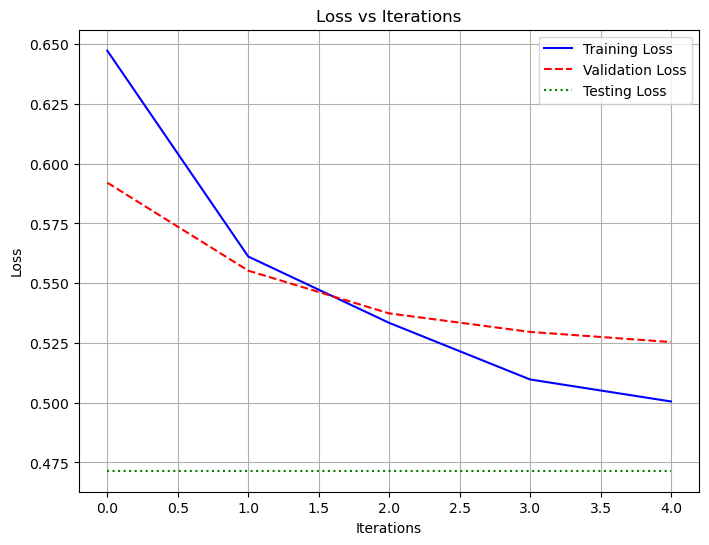

Plots for Model_0.2: Dropout=0.2, Activation Function=ReLU, Optimizer=SGD, Accuracy=0.8125


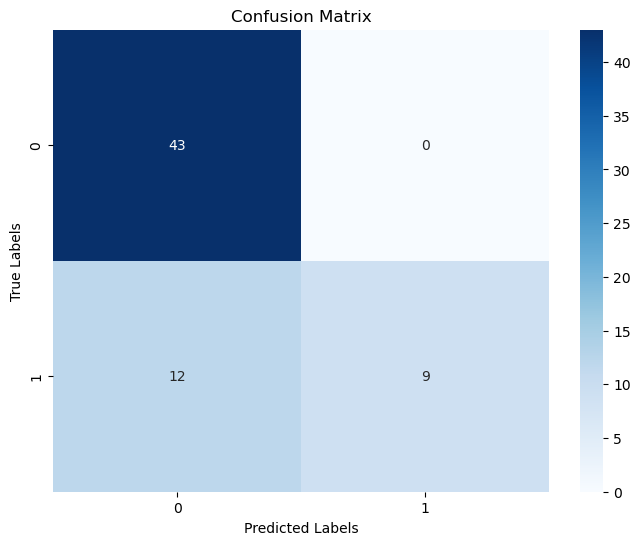

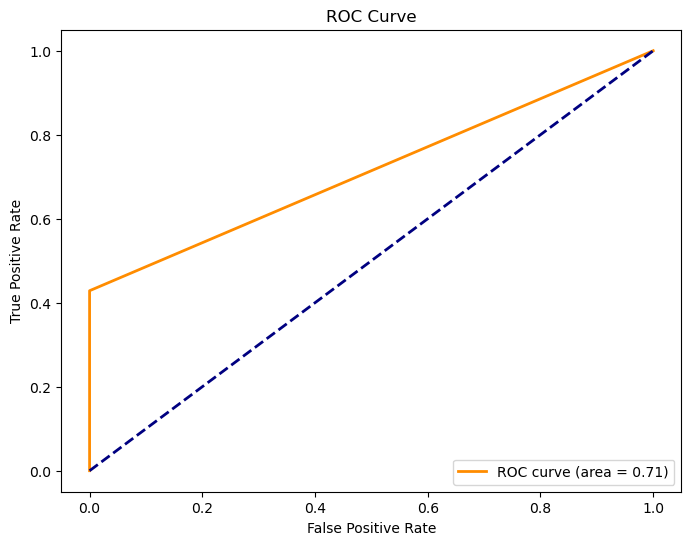

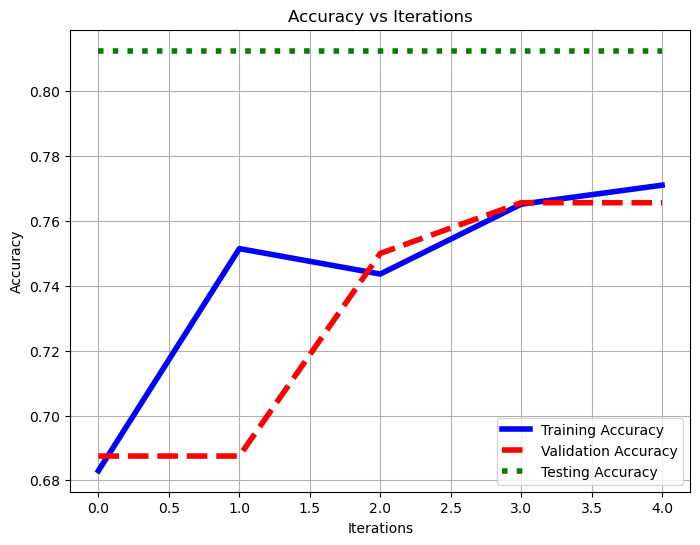

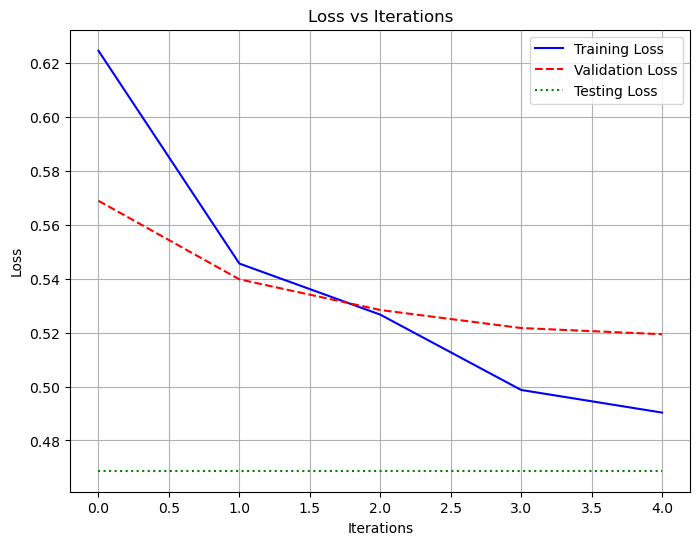

In [869]:
# Define hyperparameters for tuning
dropout_rates = [0.1, 0.5, 0.2]
# Hyperparameter tuning for Dropout
for dropout_rate in dropout_rates:
    model = NN(dropout_rate=dropout_rate, lr = 0.0444)
    accuracy, test_predictions, test_targets, test_losses, tas, vas, tl, vl, test_accuracies = train_model(model, model.optimizer, f"Model_{dropout_rate}")
    print(f'Plots for Model_{dropout_rate}: Dropout={dropout_rate}, Activation Function={model.activation.__class__.__name__}, Optimizer={model.optimizer.__class__.__name__}, Accuracy={accuracy}')
    plots(test_predictions, test_targets, test_losses, tas, vas, tl, vl, test_accuracies)

Plots for Model_Adagrad: Dropout=0.1, Activation Function=ReLU, Optimizer=Adagrad, Accuracy=0.8125


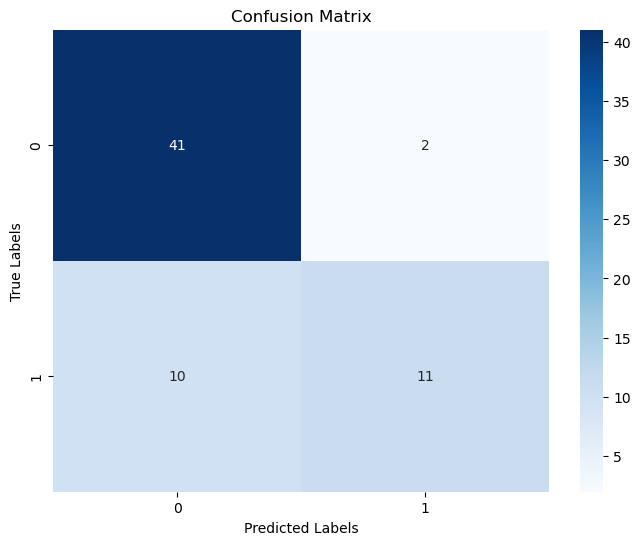

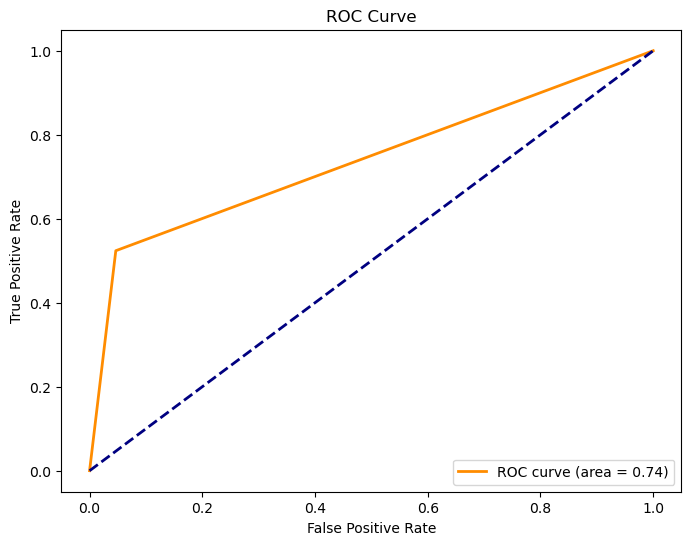

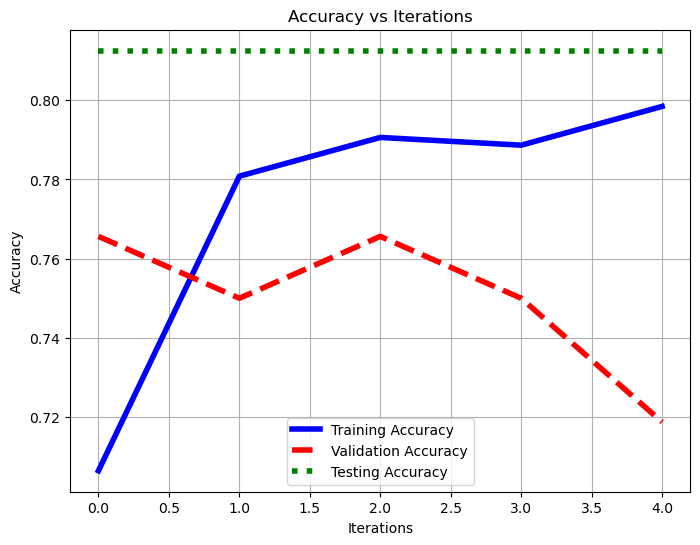

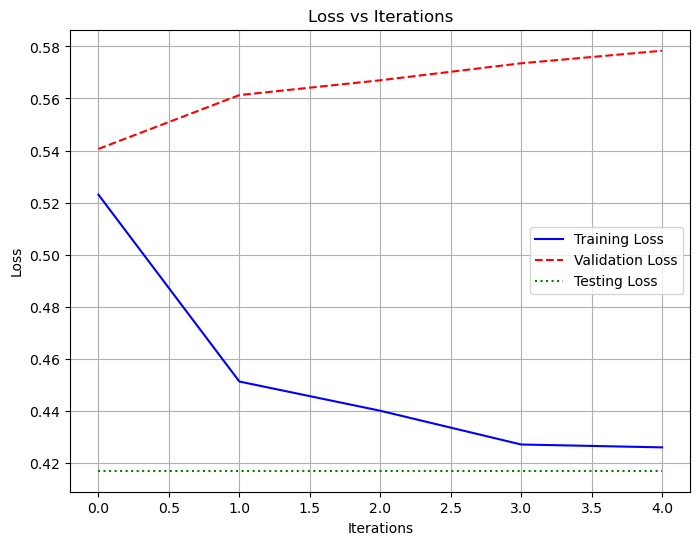

Plots for Model_Adam: Dropout=0.1, Activation Function=ReLU, Optimizer=Adam, Accuracy=0.78125


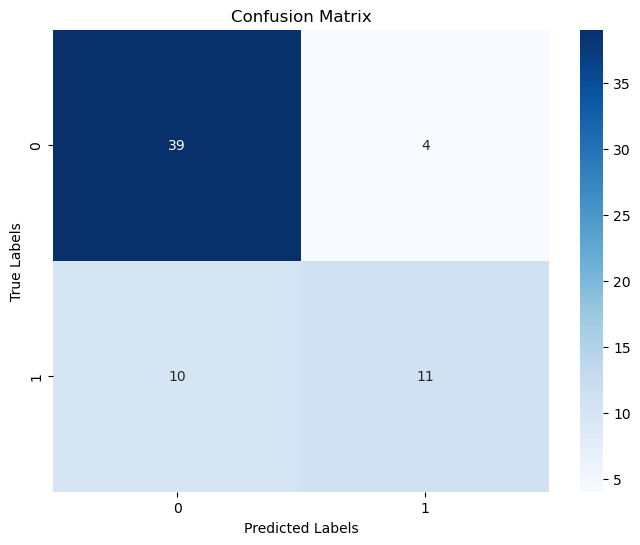

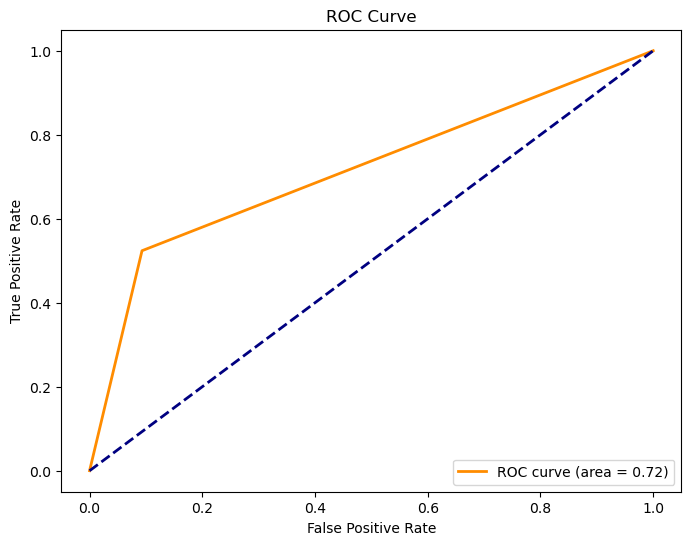

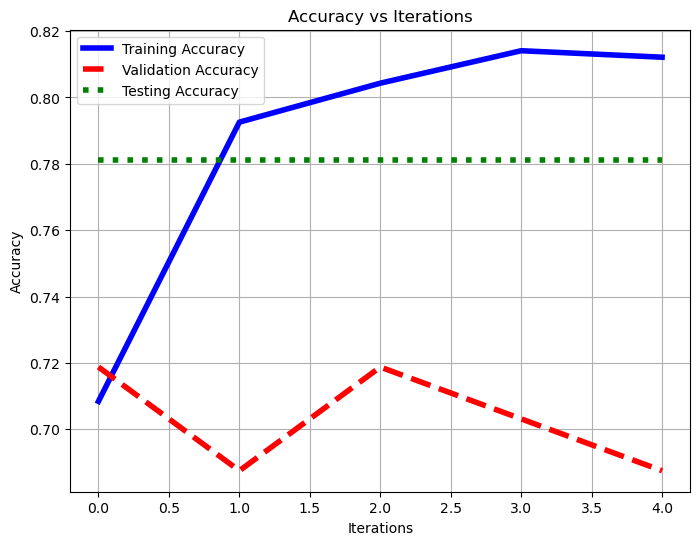

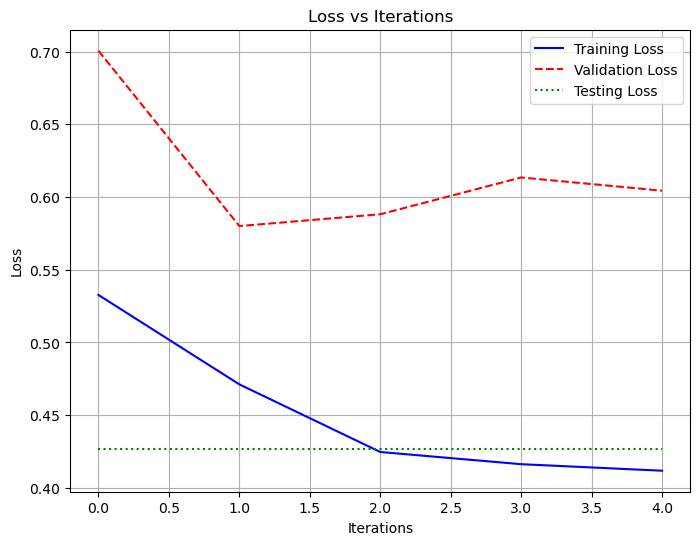

Plots for Model_RMSprop: Dropout=0.1, Activation Function=ReLU, Optimizer=RMSprop, Accuracy=0.78125


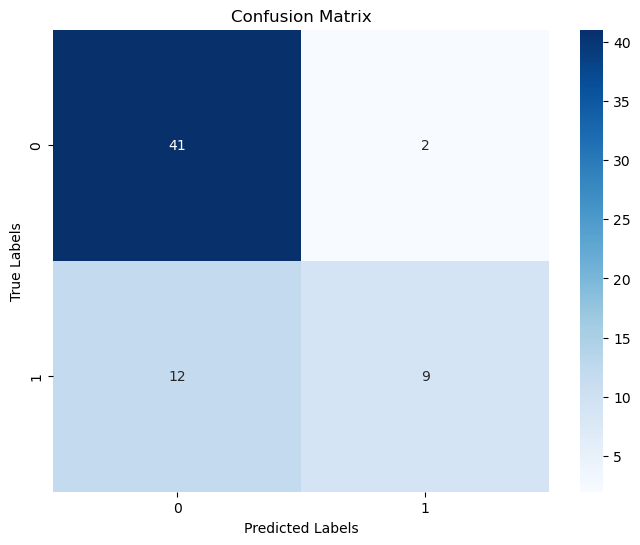

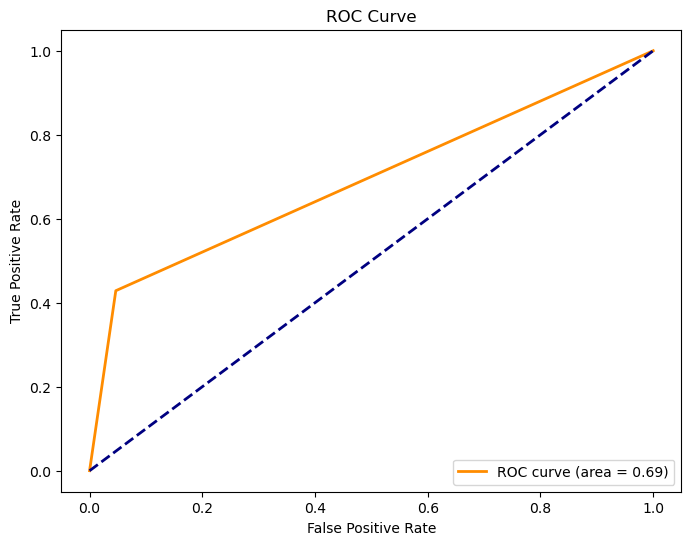

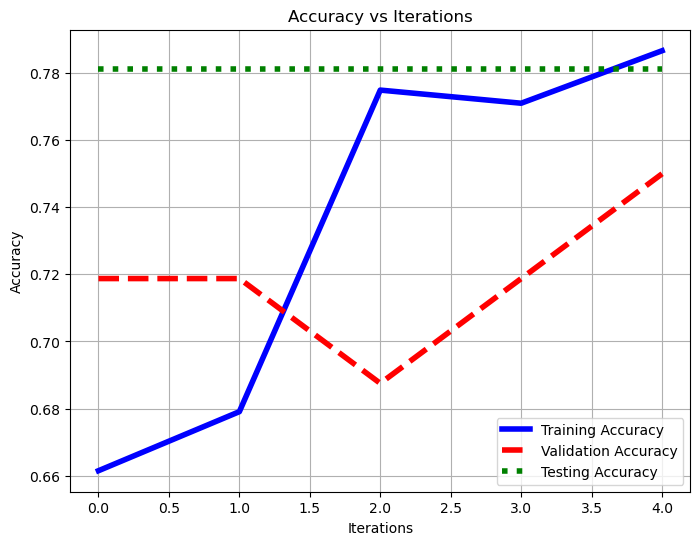

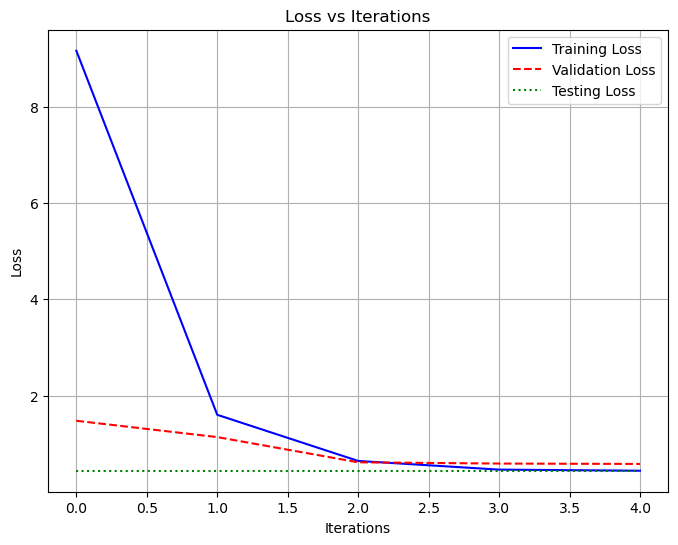

In [754]:
optimizers = ['Adagrad', 'Adam', 'RMSprop']
# Hyperparameter tuning for Optimizer
for optimizer_name in optimizers:
    if optimizer_name == 'Adagrad':
        model = NN(dropout_rate=0.1, lr=0.044, optimizer_name='Adagrad')
    elif optimizer_name == 'Adam':
        model = NN(dropout_rate=0.1, lr=0.044, optimizer_name='Adam')  # Different LR for SGD
    elif optimizer_name == 'RMSprop':
        model = NN(dropout_rate=0.1, lr=0.044, optimizer_name='RMSprop')
    accuracy, test_predictions, test_targets, test_losses, tas, vas, tl, vl, test_accuracies = train_model(model, model.optimizer, f"Model_{optimizer_name}")
    print(f'Plots for Model_{optimizer_name}: Dropout=0.1, Activation Function={model.activation.__class__.__name__}, Optimizer={model.optimizer.__class__.__name__}, Accuracy={accuracy}')
    plots(test_predictions, test_targets, test_losses, tas, vas, tl, vl, test_accuracies)
    
   

Plots for Model_LeakyReLU: Dropout=0.1, Activation Function=LeakyReLU, Optimizer=SGD, Accuracy=0.828125


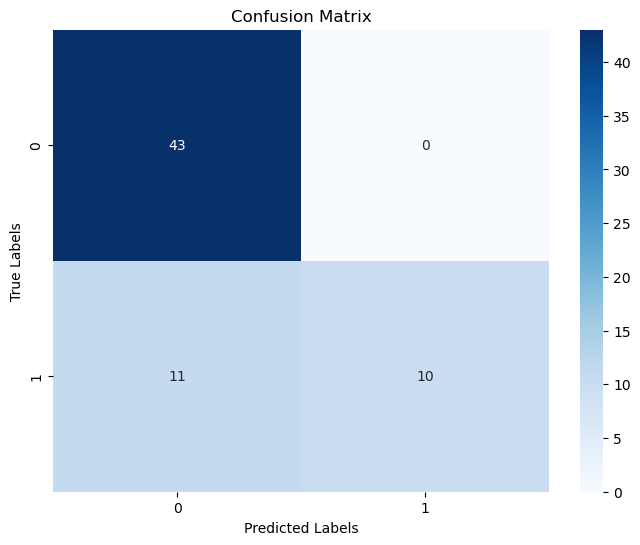

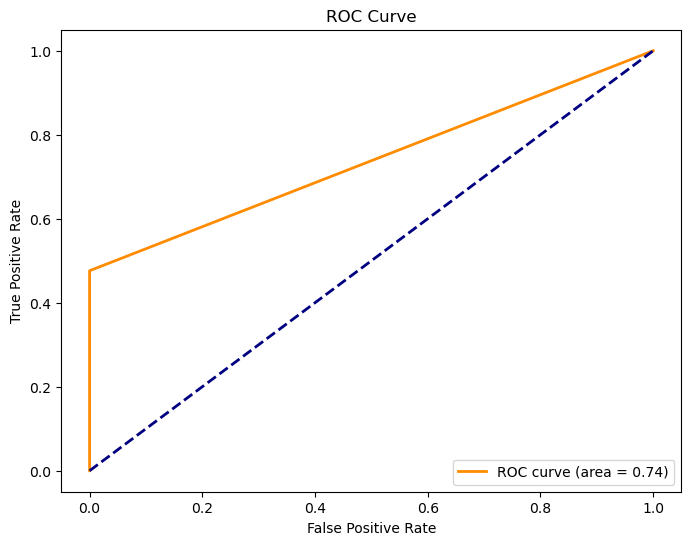

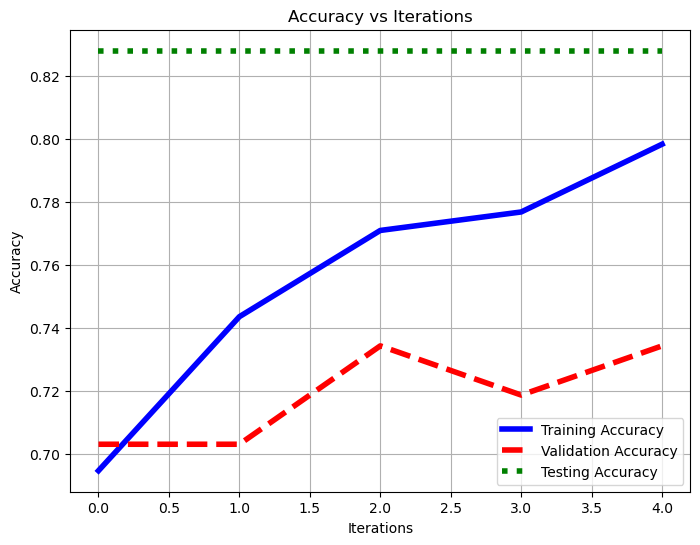

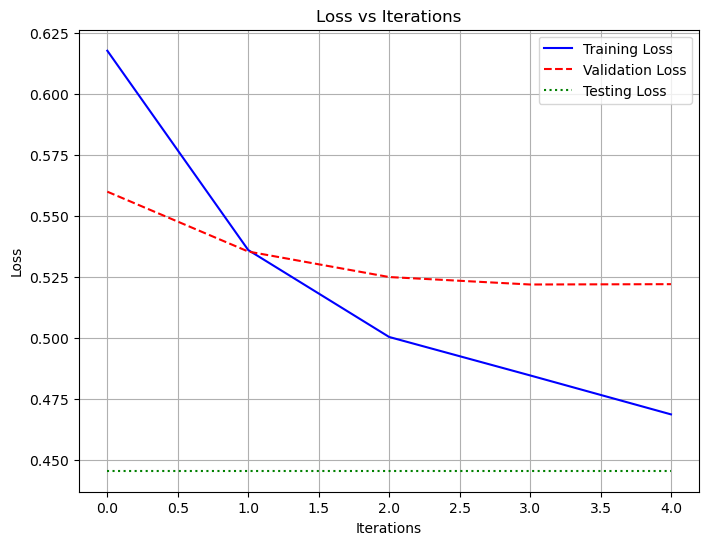

Plots for Model_Sigmoid: Dropout=0.1, Activation Function=Sigmoid, Optimizer=SGD, Accuracy=0.671875


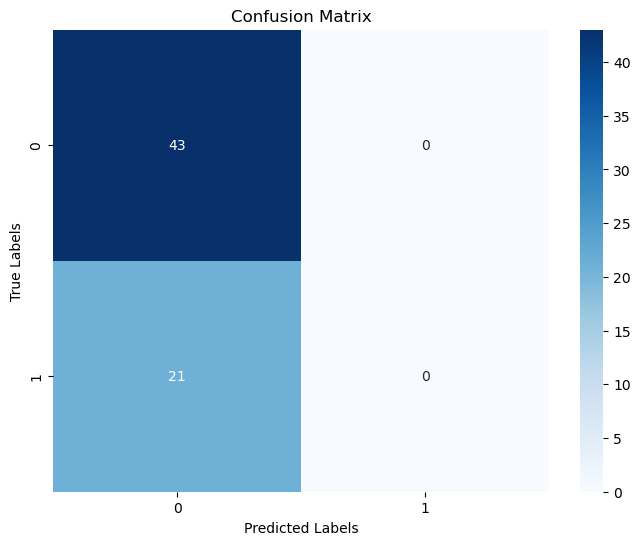

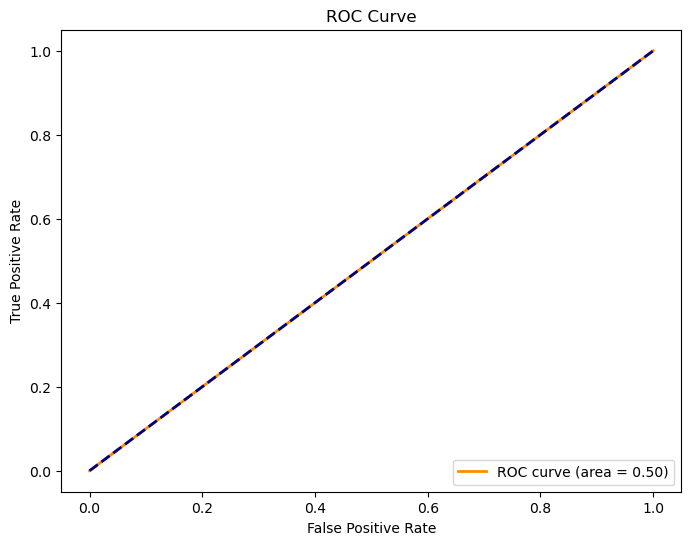

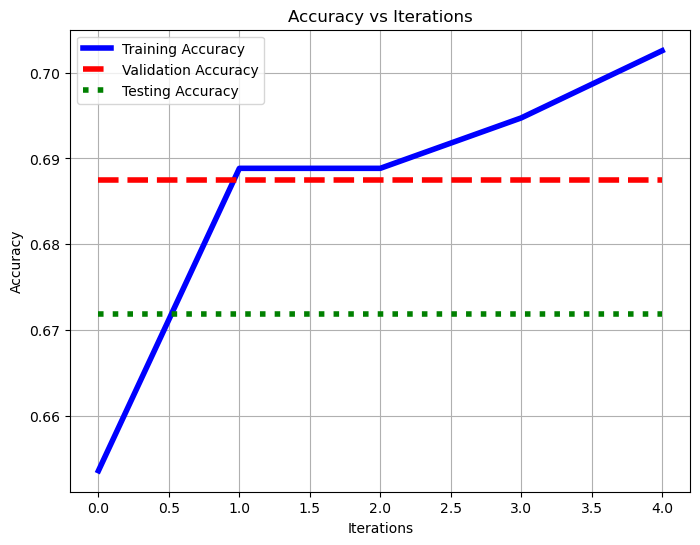

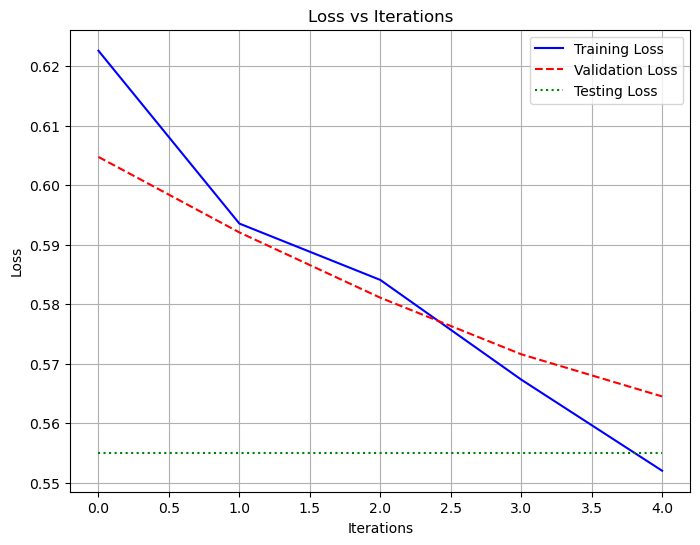

Plots for Model_Tanh: Dropout=0.1, Activation Function=Tanh, Optimizer=SGD, Accuracy=0.796875


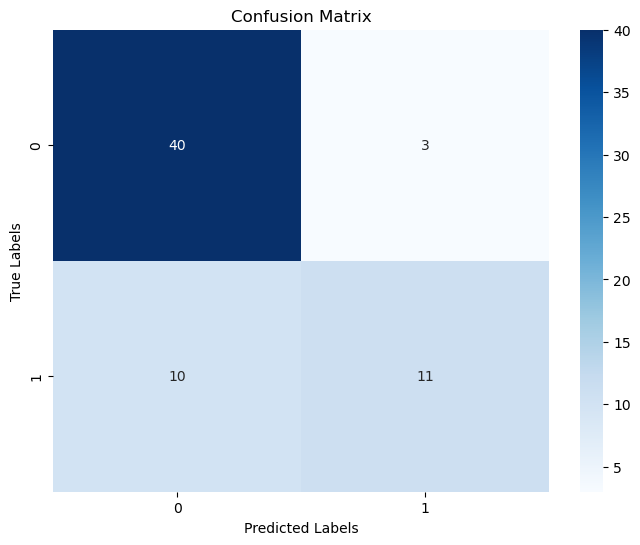

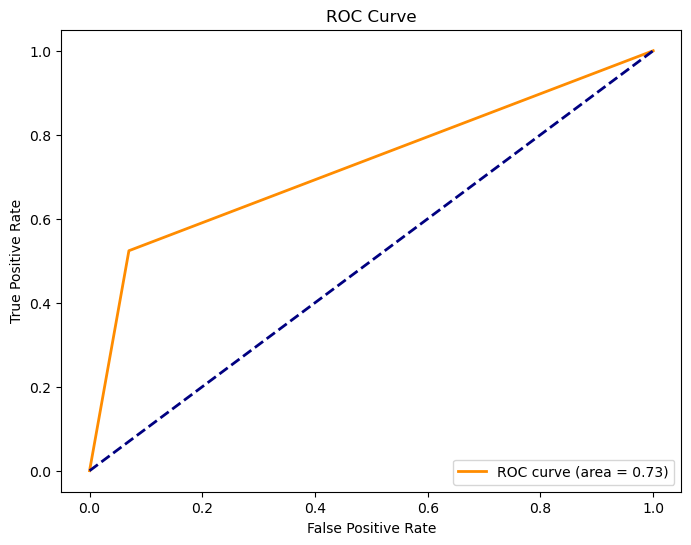

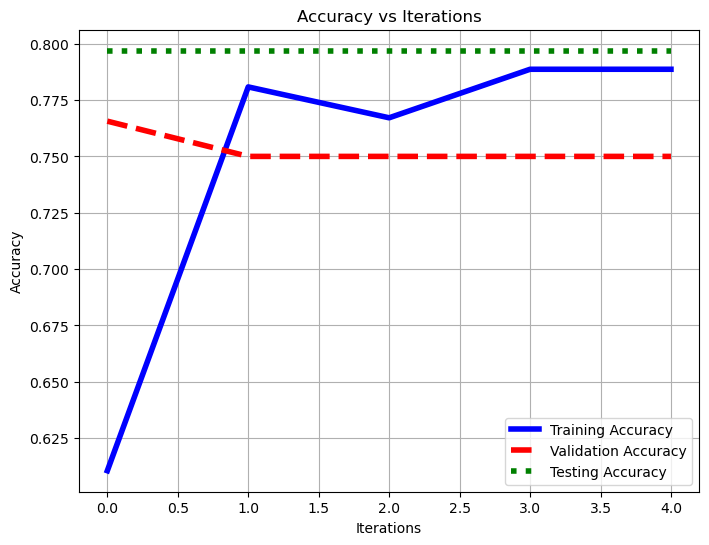

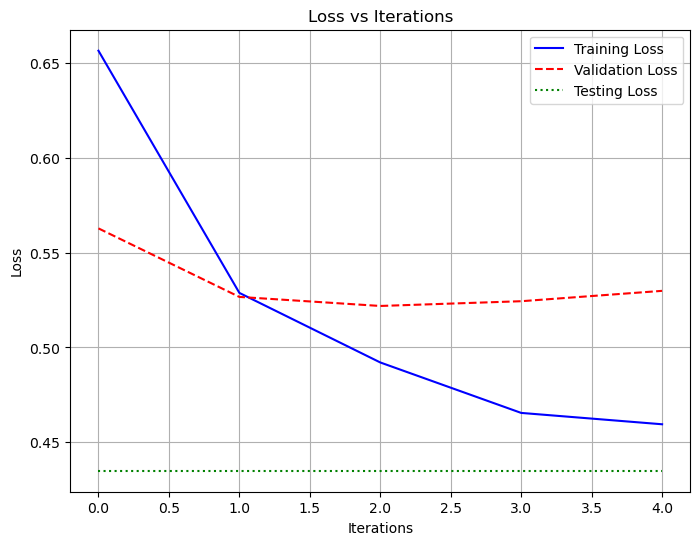

In [755]:
activation_functions = ['LeakyReLU', 'Sigmoid', 'Tanh']
# Hyperparameter tuning for Activation Function
for activation_function in activation_functions:
    model = NN(dropout_rate=0.1, lr=0.0444, activation_function=activation_function)    
    accuracy, test_predictions, test_targets, test_losses, tas, vas, tl, vl, test_accuracies = train_model(model, model.optimizer, f"Model_{activation_function}")
    print(f'Plots for Model_{activation_function}: Dropout=0.1, Activation Function={model.activation.__class__.__name__}, Optimizer={model.optimizer.__class__.__name__}, Accuracy={accuracy}')
    plots(test_predictions, test_targets, test_losses, tas, vas, tl, vl, test_accuracies)
    

# Choose Model with best accuracy

In [18]:
#As the below model has highest accuracy, we are choosing this as a base model for Step4 
#Model_LeakyReLU: Dropout=0.1, Activation Function=LeakyReLU, Optimizer=SGD, Accuracy=0.828125
model = torch.load('full_modelModel_LeakyReLU.h5')
model

NN(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=7, out_features=128, bias=True)
  )
  (output_layer): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (activation): LeakyReLU(negative_slope=0.01)
)

In [22]:
model.eval()  # Set the model to evaluation mode
test_predictions = []
test_targets = []
test_accuracies = []  # List to store accuracy for each batch
test_losses = []

with torch.no_grad():  
    for i in range(0, len(X_test), batch_size):
        # Extract current batch
        batch_features = torch.tensor(X_test[i:i + batch_size].values, dtype=torch.float32)
        batch_labels = torch.tensor(y_test[i:i + batch_size].values, dtype=torch.float32)

        # Forward pass
        outputs = model(batch_features)
        predictions = torch.round(outputs.squeeze())

        # Calculate loss for this batch
        batch_loss = criterion(outputs.squeeze(), batch_labels)
        test_losses.append(batch_loss.item()) 

        batch_accuracy = torch.sum(predictions == batch_labels).item() / batch_size
        test_accuracies.append(batch_accuracy)

        # Append predictions and targets for evaluation
        test_predictions.extend(predictions.tolist())
        test_targets.extend(batch_labels.tolist())

# Calculate accuracy
accuracy_base = accuracy_score(test_targets, test_predictions)

In [813]:
accuracy

0.828125

In [748]:
model.optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.0444
    maximize: False
    momentum: 0.335
    nesterov: False
    weight_decay: 0
)

# Batch Normalization

In [815]:
from torch.nn.modules import dropout
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim

# Define the neural network
class NN(nn.Module):
    def __init__(self, input, hidden, output, hls=3, dprob=0.5):
        super(NN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.batch_norm_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input, hidden))
        self.batch_norm_layers.append(nn.BatchNorm1d(hidden))
        for _ in range(hls - 1):
            self.hidden_layers.append(nn.Linear(hidden, hidden))
        self.batch_norm_layers.append(nn.BatchNorm1d(hidden))
        self.output_layer = nn.Linear(hidden, output)
        self.dropout = nn.Dropout(dprob)

    def forward(self, x):
        for layer, batch_norm_layer in zip(self.hidden_layers, self.batch_norm_layers):
            x = F.leaky_relu(layer(x))            
            x = self.dropout(x)
        x = batch_norm_layer(x)    
        x = self.output_layer(x)
        return torch.sigmoid(x)

# 7 features that we have
input = 7
hidden = 128  # Node in middle hidden layes
output = 1  # we have to predict either 0 or 1 and so only one output

# Instantiate the model
model = NN(input, hidden, output, hls=1,dprob=0.1429)

# Print model summary
print(summary(model, input=(1, input)))

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.044, momentum=0.335)

Layer (type:depth-idx)                   Param #
NN                                       --
├─ModuleList: 1-1                        --
│    └─Linear: 2-1                       1,024
├─ModuleList: 1-2                        --
│    └─BatchNorm1d: 2-2                  256
│    └─BatchNorm1d: 2-3                  256
├─Linear: 1-3                            129
├─Dropout: 1-4                           --
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0


In [816]:
# Number of epochs and batch size
epochs = 5
batch_size = 64

tas_batch = []  # Training accuracies
vas = []  # Validation accuracies
testas_batch = []  # Test accuracies

tl = []  # Training Losses
vl = []  # Validation Losses
testl = []  # Test Losses

for epoch in range(epochs):
    # Training phase
    model.train()  # Set the model to training mode
    total_loss = 0
    correct_train = 0
    total_train = 0

    # Iterate over batches of the training data
    for i in range(0, len(X_train), batch_size):
        # Extract current batch
        batch_features = torch.tensor(X_train[i:i + batch_size].values, dtype=torch.float32)
        batch_labels = torch.tensor(y_train[i:i + batch_size].values, dtype=torch.float32)
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs.squeeze(), batch_labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch_features.size(0)
        # Calculate training accuracy
        predicted = torch.round(outputs.squeeze())
        correct_train += (predicted == batch_labels).sum().item()
        total_train += batch_labels.size(0)

    # Calculate average training loss and accuracy for this epoch
    train_loss = total_loss / len(X_train)
    train_accuracy = correct_train / total_train
    tas_batch.append(train_accuracy)
    tl.append(train_loss)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    correct_val = 0
    total_val = 0
    # Iterate over batches of the validation data
    with torch.no_grad():  # Disable gradient computation during validation
        for i in range(0, len(X_val), batch_size):            
            batch_features = torch.tensor(X_val[i:i + batch_size].values, dtype=torch.float32)
            batch_labels = torch.tensor(y_val[i:i + batch_size].values, dtype=torch.float32)
            outputs = model(batch_features)
            loss = criterion(outputs.squeeze(), batch_labels)
            val_loss += loss.item() * batch_features.size(0) 
            predicted = torch.round(outputs.squeeze())
            correct_val += (predicted == batch_labels).sum().item()
            total_val += batch_labels.size(0)
    # Calculate average validation loss and accuracy for this epoch
    val_loss = val_loss / len(X_val)
    val_accuracy = correct_val / total_val
    vas.append(val_accuracy)
    vl.append(val_loss)
    
    # Print training, validation, and test loss, accuracy for this epoch
    print(f'Epoch {epoch + 1}/{epochs}, '
          f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')
    
# Save the model to a file
torch.save(model.state_dict(), 'Model_Batch.h5')  
torch.save(model, 'FullModel_Batch.h5')

model.eval()  # Set the model to evaluation mode
test_predictions = []
test_targets = []
test_accuracies = []  # List to store accuracy for each batch
test_losses = []

with torch.no_grad():  
    for i in range(0, len(X_test), batch_size):
        # Extract current batch
        batch_features = torch.tensor(X_test[i:i + batch_size].values, dtype=torch.float32)
        batch_labels = torch.tensor(y_test[i:i + batch_size].values, dtype=torch.float32)

        # Forward pass
        outputs = model(batch_features)
        predictions = torch.round(outputs.squeeze())

        # Calculate loss for this batch
        batch_loss = criterion(outputs.squeeze(), batch_labels)
        test_losses.append(batch_loss.item()) 

        batch_accuracy = torch.sum(predictions == batch_labels).item() / batch_size
        test_accuracies.append(batch_accuracy)

        # Append predictions and targets for evaluation
        test_predictions.extend(predictions.tolist())
        test_targets.extend(batch_labels.tolist())

# Calculate accuracy
accuracy = accuracy_score(test_targets, test_predictions)
print(f'Accuracy on testing data: {accuracy}')

Epoch 1/5, Training Loss: 0.6349, Training Accuracy: 0.6399, Validation Loss: 0.5991, Validation Accuracy: 0.7031
Epoch 2/5, Training Loss: 0.5349, Training Accuracy: 0.7358, Validation Loss: 0.5736, Validation Accuracy: 0.6875
Epoch 3/5, Training Loss: 0.5114, Training Accuracy: 0.7339, Validation Loss: 0.5672, Validation Accuracy: 0.7188
Epoch 4/5, Training Loss: 0.4891, Training Accuracy: 0.7573, Validation Loss: 0.5754, Validation Accuracy: 0.6875
Epoch 5/5, Training Loss: 0.4702, Training Accuracy: 0.7730, Validation Loss: 0.5750, Validation Accuracy: 0.6719
Accuracy on testing data: 0.75


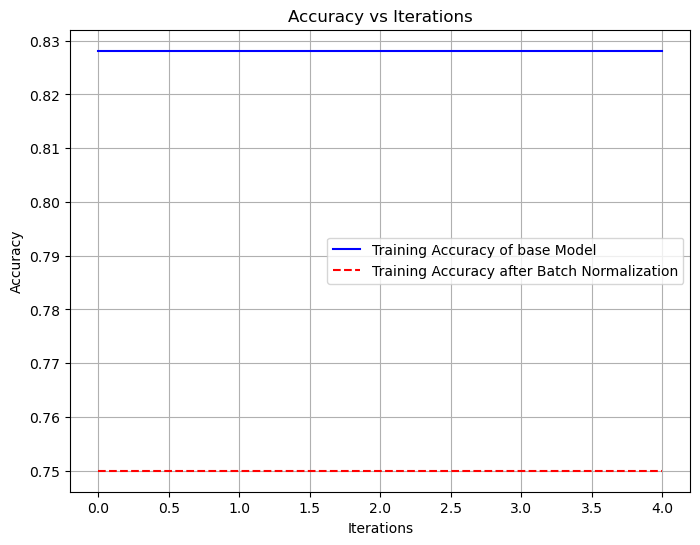

In [817]:
import matplotlib.pyplot as plt
x= [i for i in range(0,5)]

plt.figure(figsize=(8, 6))

# Plot y1 with a blue solid line
plt.plot(x, [accuracy_base]*5, color='blue', linestyle='-', label='Training Accuracy of base Model')

# Plot y2 with a red dashed line
plt.plot(x, [accuracy]*5, color='red', linestyle='--', label='Training Accuracy after Batch Normalization')


# Customize the plot
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations')
plt.legend()  # Show legend based on the 'label' argument in the plot function
plt.grid(True)

# Show the plot
plt.show()

# LearningRate Schedular

In [818]:
from torch.nn.modules import dropout
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim

# Define the neural network
class NN(nn.Module):
    def __init__(self, input, hidden, output, hls=3, dprob=0.5):
        super(NN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input, hidden))
        for _ in range(hls - 1):
            self.hidden_layers.append(nn.Linear(hidden, hidden))
        self.output_layer = nn.Linear(hidden, output)
        self.dropout = nn.Dropout(dprob)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = F.leaky_relu(layer(x))
            x = self.dropout(x)
        x = self.output_layer(x)
        return torch.sigmoid(x)

# 7 features that we have
input = 7
hidden = 128  # Node in middle hidden layes
output = 1  # we have to predict either 0 or 1 and so only one output

# Instantiate the model
model = NN(input, hidden, output, hls=1,dprob=0.142)

# Print model summary
print(summary(model, input=(1, input)))

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0444, momentum=0.335)

Layer (type:depth-idx)                   Param #
NN                                       --
├─ModuleList: 1-1                        --
│    └─Linear: 2-1                       1,024
├─Linear: 1-2                            129
├─Dropout: 1-3                           --
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0


In [823]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Number of epochs and batch size
epochs = 5
batch_size = 64

tas_learning = []  # Training accuracies
vas = []  # Validation accuracies
testas_learning = []  # Test accuracies

tl = []  # Training Losses
vl = []  # Validation Losses
testl = []  # Test Losses

scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.1, verbose=True)

for epoch in range(epochs):
    # Training phase
    model.train()  # Set the model to training mode
    total_loss = 0
    correct_train = 0
    total_train = 0

    # Iterate over batches of the training data
    for i in range(0, len(X_train), batch_size):
        # Extract current batch
        batch_features = torch.tensor(X_train[i:i + batch_size].values, dtype=torch.float32)
        batch_labels = torch.tensor(y_train[i:i + batch_size].values, dtype=torch.float32)
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs.squeeze(), batch_labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch_features.size(0)
        # Calculate training accuracy
        predicted = torch.round(outputs.squeeze())
        correct_train += (predicted == batch_labels).sum().item()
        total_train += batch_labels.size(0)

    # Calculate average training loss and accuracy for this epoch
    train_loss = total_loss / len(X_train)
    train_accuracy = correct_train / total_train
    tas_learning.append(train_accuracy)
    tl.append(train_loss)

    # Validation phase
    model.eval()  
    val_loss = 0
    correct_val = 0
    total_val = 0

    # Iterate over batches of the validation data
    with torch.no_grad():
        for i in range(0, len(X_val), batch_size):
            # Extract current batch
            batch_features = torch.tensor(X_val[i:i + batch_size].values, dtype=torch.float32)
            batch_labels = torch.tensor(y_val[i:i + batch_size].values, dtype=torch.float32)
            # Forward pass
            outputs = model(batch_features)
            # Compute the loss
            loss = criterion(outputs.squeeze(), batch_labels)
            val_loss += loss.item() * batch_features.size(0) 
            # Calculate validation accuracy
            predicted = torch.round(outputs.squeeze())
            correct_val += (predicted == batch_labels).sum().item()
            total_val += batch_labels.size(0)

    # Calculate average validation loss and accuracy for this epoch
    val_loss = val_loss / len(X_val)
    val_accuracy = correct_val / total_val
    vas.append(val_accuracy)
    vl.append(val_loss)
    
    scheduler.step(val_loss)

# Save the model to a file
torch.save(model.state_dict(), 'Model_Learning.h5')  
torch.save(model, 'FullModel_Learning.h5')

model.eval()  # Set the model to evaluation mode
test_predictions = []
test_targets = []
test_accuracies = []  # List to store accuracy for each batch
test_losses = []

with torch.no_grad():  
    for i in range(0, len(X_test), batch_size):
        # Extract current batch
        batch_features = torch.tensor(X_test[i:i + batch_size].values, dtype=torch.float32)
        batch_labels = torch.tensor(y_test[i:i + batch_size].values, dtype=torch.float32)

        # Forward pass
        outputs = model(batch_features)
        predictions = torch.round(outputs.squeeze())

        # Calculate loss for this batch
        batch_loss = criterion(outputs.squeeze(), batch_labels)
        test_losses.append(batch_loss.item()) 

        batch_accuracy = torch.sum(predictions == batch_labels).item() / batch_size
        test_accuracies.append(batch_accuracy)

        # Append predictions and targets for evaluation
        test_predictions.extend(predictions.tolist())
        test_targets.extend(batch_labels.tolist())

# Calculate accuracy
accuracy = accuracy_score(test_targets, test_predictions)
print(f'Accuracy of test data: {accuracy}')

Accuracy of test data: 0.78125


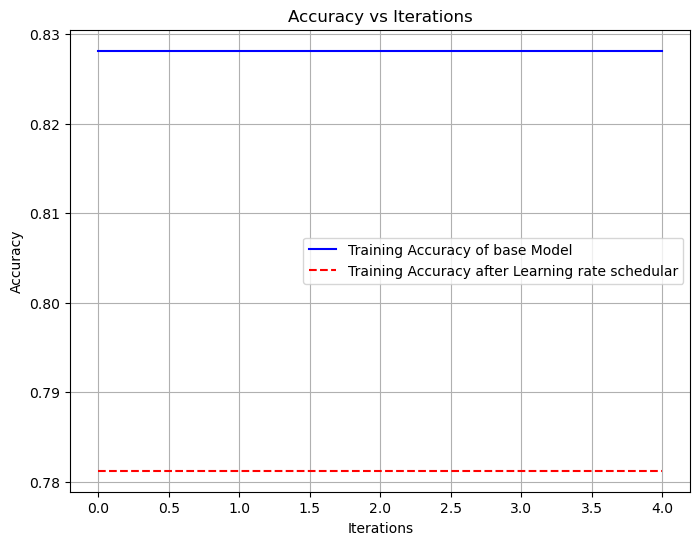

In [824]:
import matplotlib.pyplot as plt
x= [i for i in range(0,5)]

plt.figure(figsize=(8, 6))

# Plot y1 with a blue solid line
plt.plot(x, [accuracy_base]*5, color='blue', linestyle='-', label='Training Accuracy of base Model')

# Plot y2 with a red dashed line
plt.plot(x, [accuracy]*5, color='red', linestyle='--', label='Training Accuracy after Learning rate schedular')


# Customize the plot
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations')
plt.legend()  # Show legend based on the 'label' argument in the plot function
plt.grid(True)

# Show the plot
plt.show()

# Early Stopping

In [17]:
from torch.nn.modules import dropout
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim

# Define the neural network
class NN(nn.Module):
    def __init__(self, input, hidden, output, hls=3, dprob=0.5):
        super(NN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input, hidden))
        for _ in range(hls - 1):
            self.hidden_layers.append(nn.Linear(hidden, hidden))
        self.output_layer = nn.Linear(hidden, output)
        self.dropout = nn.Dropout(dprob)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = F.leaky_relu(layer(x))
            x = self.dropout(x)
        x = self.output_layer(x)
        return torch.sigmoid(x)

# 7 features that we have
input = 7
hidden = 128  # Node in middle hidden layes
output = 1  # we have to predict either 0 or 1 and so only one output

# Instantiate the model
model = NN(input, hidden, output, hls=1,dprob=0.142)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0444, momentum = 0.335)

In [26]:
from sklearn.metrics import accuracy_score

# Number of epochs and batch size
epochs = 100
batch_size = 64

tas_learning = []  # Training accuracies
vas = []  # Validation accuracies
testas_learning = []  # Test accuracies

tl = []  # Training Losses
vl = []  # Validation Losses
testl = []  # Test Losses

best_val_accuracy = 0
early_stopping_counter = 0
early_stopping_patience= 2
for epoch in range(epochs):
    # Training phase
    model.train()  # Set the model to training mode
    total_loss = 0
    correct_train = 0
    total_train = 0

    # Iterate over batches of the training data
    for i in range(0, len(X_train), batch_size):
        # Extract current batch
        batch_features = torch.tensor(X_train[i:i + batch_size].values, dtype=torch.float32)
        batch_labels = torch.tensor(y_train[i:i + batch_size].values, dtype=torch.float32)
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs.squeeze(), batch_labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch_features.size(0)  
        predicted = torch.round(outputs.squeeze()) 
        correct_train += (predicted == batch_labels).sum().item()
        total_train += batch_labels.size(0)

    # Calculate average training loss and accuracy for this epoch
    train_loss = total_loss / len(X_train)
    train_accuracy = correct_train / total_train
    tas_learning.append(train_accuracy)
    tl.append(train_loss)

    # Validation phase
    model.eval()  
    val_loss = 0
    correct_val = 0
    total_val = 0

    # Iterate over batches of the validation data
    with torch.no_grad():  
        for i in range(0, len(X_val), batch_size):            
            batch_features = torch.tensor(X_val[i:i + batch_size].values, dtype=torch.float32)
            batch_labels = torch.tensor(y_val[i:i + batch_size].values, dtype=torch.float32)           
            outputs = model(batch_features)
            loss = criterion(outputs.squeeze(), batch_labels)
            val_loss += loss.item() * batch_features.size(0) 
            predicted = torch.round(outputs.squeeze())  
            correct_val += (predicted == batch_labels).sum().item()
            total_val += batch_labels.size(0)

    # Calculate average validation loss and accuracy for this epoch
    val_loss = val_loss / len(X_val)
    val_accuracy = correct_val / total_val
    vas.append(val_accuracy)
    vl.append(val_loss)
    
    print(f"Epoch {epoch + 1}/{epochs} => "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    # Check for early stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= early_stopping_patience:
        print("Early stopping!")
        break

# Save the model to a file
torch.save(model.state_dict(), 'Model_earlystopping.h5')  
torch.save(model, 'Full_Model_earlystopping.h5')
  
model.eval()  # Set the model to evaluation mode
test_predictions = []
test_targets = []
test_accuracies = []  # List to store accuracy for each batch
test_losses = []

with torch.no_grad():  
    for i in range(0, len(X_test), batch_size):
        # Extract current batch
        batch_features = torch.tensor(X_test[i:i + batch_size].values, dtype=torch.float32)
        batch_labels = torch.tensor(y_test[i:i + batch_size].values, dtype=torch.float32)
        outputs = model(batch_features)
        predictions = torch.round(outputs.squeeze())

        # Calculate loss for this batch
        batch_loss = criterion(outputs.squeeze(), batch_labels)
        test_losses.append(batch_loss.item()) 

        batch_accuracy = torch.sum(predictions == batch_labels).item() / batch_size
        test_accuracies.append(batch_accuracy)

        # Append predictions and targets for evaluation
        test_predictions.extend(predictions.tolist())
        test_targets.extend(batch_labels.tolist())

# Calculate accuracy
accuracy = accuracy_score(test_targets, test_predictions)
print(f'Accuracy of testing data: {accuracy}')


Epoch 1/100 => Train Loss: 0.4623, Train Accuracy: 0.7867, Val Loss: 0.5221, Val Accuracy: 0.7344
Epoch 2/100 => Train Loss: 0.4612, Train Accuracy: 0.8004, Val Loss: 0.5221, Val Accuracy: 0.7344
Epoch 3/100 => Train Loss: 0.4587, Train Accuracy: 0.7984, Val Loss: 0.5221, Val Accuracy: 0.7344
Early stopping!
Accuracy of testing data: 0.828125


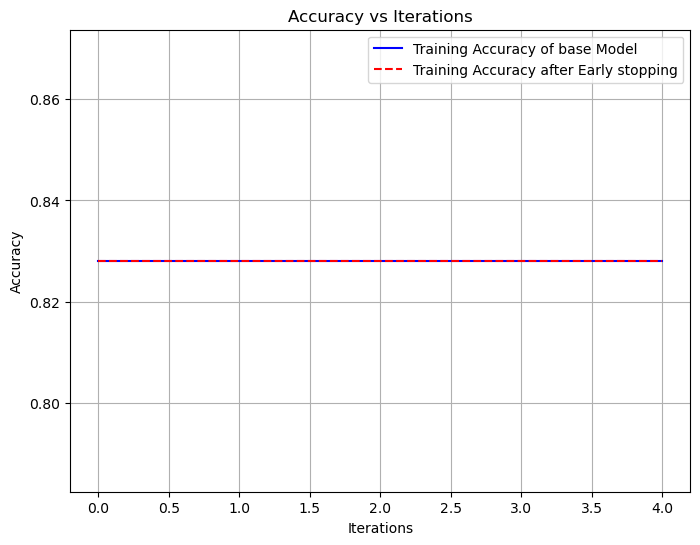

In [24]:
import matplotlib.pyplot as plt
x= [i for i in range(0,5)]

plt.figure(figsize=(8, 6))

# Plot y1 with a blue solid line
plt.plot(x, [accuracy_base]*5, color='blue', linestyle='-', label='Training Accuracy of base Model')

# Plot y2 with a red dashed line
plt.plot(x, [accuracy]*5, color='red', linestyle='--', label='Training Accuracy after Early stopping')


# Customize the plot
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations')
plt.legend()  # Show legend based on the 'label' argument in the plot function
plt.grid(True)

# Show the plot
plt.show()

# Regularization- weight_decay=0.001

In [28]:
from torch.nn.modules import dropout
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim

# Define the neural network
class NN(nn.Module):
    def __init__(self, input, hidden, output, hls=3, dprob=0.5):
        super(NN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input, hidden))
        for _ in range(hls - 1):
            self.hidden_layers.append(nn.Linear(hidden, hidden))
        self.output_layer = nn.Linear(hidden, output)
        self.dropout = nn.Dropout(dprob)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = F.leaky_relu(layer(x))
            x = self.dropout(x)
        x = self.output_layer(x)
        return torch.sigmoid(x)

# 7 features that we have
input = 7
hidden = 128  # Node in middle hidden layes
output = 1  # we have to predict either 0 or 1 and so only one output

# Instantiate the model
model = NN(input, hidden, output, hls=1,dprob=0.142)

criterion = nn.BCELoss()
# Add regularization by giving weight_decay=0.001, which will penalize the large weights during training process
#which prevents overfitting
optimizer = optim.SGD(model.parameters(), lr=0.0444, momentum = 0.335, weight_decay=0.001)

In [29]:
from sklearn.metrics import accuracy_score

# Number of epochs and batch size
epochs = 100
batch_size = 64

tas_learning = []  # Training accuracies
vas = []  # Validation accuracies
testas_learning = []  # Test accuracies

tl = []  # Training Losses
vl = []  # Validation Losses
testl = []  # Test Losses

best_val_accuracy = 0
early_stopping_counter = 0
early_stopping_patience= 2
for epoch in range(epochs):
    # Training phase
    model.train()  # Set the model to training mode
    total_loss = 0
    correct_train = 0
    total_train = 0

    # Iterate over batches of the training data
    for i in range(0, len(X_train), batch_size):
        # Extract current batch
        batch_features = torch.tensor(X_train[i:i + batch_size].values, dtype=torch.float32)
        batch_labels = torch.tensor(y_train[i:i + batch_size].values, dtype=torch.float32)
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs.squeeze(), batch_labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch_features.size(0)  
        predicted = torch.round(outputs.squeeze()) 
        correct_train += (predicted == batch_labels).sum().item()
        total_train += batch_labels.size(0)

    # Calculate average training loss and accuracy for this epoch
    train_loss = total_loss / len(X_train)
    train_accuracy = correct_train / total_train
    tas_learning.append(train_accuracy)
    tl.append(train_loss)

    # Validation phase
    model.eval()  
    val_loss = 0
    correct_val = 0
    total_val = 0

    # Iterate over batches of the validation data
    with torch.no_grad():  
        for i in range(0, len(X_val), batch_size):            
            batch_features = torch.tensor(X_val[i:i + batch_size].values, dtype=torch.float32)
            batch_labels = torch.tensor(y_val[i:i + batch_size].values, dtype=torch.float32)           
            outputs = model(batch_features)
            loss = criterion(outputs.squeeze(), batch_labels)
            val_loss += loss.item() * batch_features.size(0) 
            predicted = torch.round(outputs.squeeze())  
            correct_val += (predicted == batch_labels).sum().item()
            total_val += batch_labels.size(0)

    # Calculate average validation loss and accuracy for this epoch
    val_loss = val_loss / len(X_val)
    val_accuracy = correct_val / total_val
    vas.append(val_accuracy)
    vl.append(val_loss)
    
    print(f"Epoch {epoch + 1}/{epochs} => "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    # Check for early stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= early_stopping_patience:
        print("Early stopping!")
        break

# Save the model to a file
torch.save(model.state_dict(), 'Model_earlystopping.h5')  
torch.save(model, 'Full_Model_earlystopping.h5')
  
model.eval()  # Set the model to evaluation mode
test_predictions = []
test_targets = []
test_accuracies = []  # List to store accuracy for each batch
test_losses = []

with torch.no_grad():  
    for i in range(0, len(X_test), batch_size):
        # Extract current batch
        batch_features = torch.tensor(X_test[i:i + batch_size].values, dtype=torch.float32)
        batch_labels = torch.tensor(y_test[i:i + batch_size].values, dtype=torch.float32)
        outputs = model(batch_features)
        predictions = torch.round(outputs.squeeze())

        # Calculate loss for this batch
        batch_loss = criterion(outputs.squeeze(), batch_labels)
        test_losses.append(batch_loss.item()) 

        batch_accuracy = torch.sum(predictions == batch_labels).item() / batch_size
        test_accuracies.append(batch_accuracy)

        # Append predictions and targets for evaluation
        test_predictions.extend(predictions.tolist())
        test_targets.extend(batch_labels.tolist())

# Calculate accuracy
accuracy = accuracy_score(test_targets, test_predictions)
print(f'Accuracy of testing data: {accuracy}')


Epoch 1/100 => Train Loss: 0.6451, Train Accuracy: 0.6517, Val Loss: 0.5976, Val Accuracy: 0.6875
Epoch 2/100 => Train Loss: 0.5682, Train Accuracy: 0.7182, Val Loss: 0.5638, Val Accuracy: 0.7031
Epoch 3/100 => Train Loss: 0.5272, Train Accuracy: 0.7495, Val Loss: 0.5463, Val Accuracy: 0.6875
Epoch 4/100 => Train Loss: 0.4994, Train Accuracy: 0.7847, Val Loss: 0.5376, Val Accuracy: 0.7344
Epoch 5/100 => Train Loss: 0.4841, Train Accuracy: 0.7867, Val Loss: 0.5343, Val Accuracy: 0.7500
Epoch 6/100 => Train Loss: 0.4734, Train Accuracy: 0.7828, Val Loss: 0.5330, Val Accuracy: 0.7188
Epoch 7/100 => Train Loss: 0.4647, Train Accuracy: 0.7867, Val Loss: 0.5340, Val Accuracy: 0.7188
Early stopping!
Accuracy of testing data: 0.8125


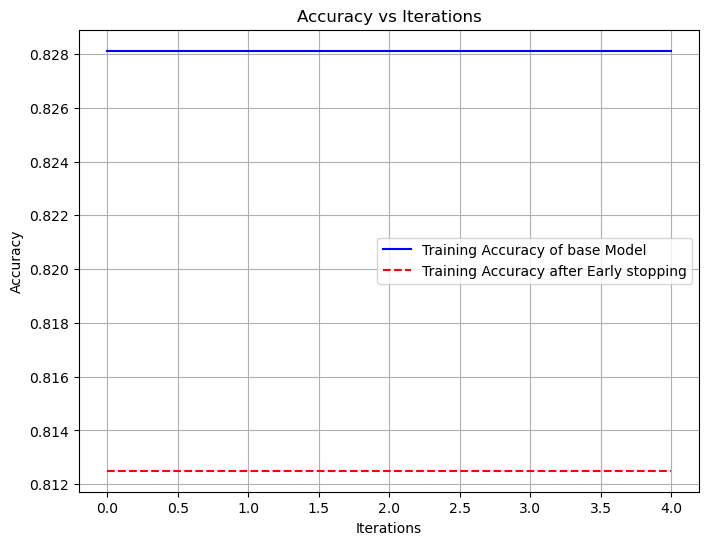

In [30]:
import matplotlib.pyplot as plt
x= [i for i in range(0,5)]

plt.figure(figsize=(8, 6))

# Plot y1 with a blue solid line
plt.plot(x, [accuracy_base]*5, color='blue', linestyle='-', label='Training Accuracy of base Model')

# Plot y2 with a red dashed line
plt.plot(x, [accuracy]*5, color='red', linestyle='--', label='Training Accuracy after Early stopping')


# Customize the plot
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations')
plt.legend()  # Show legend based on the 'label' argument in the plot function
plt.grid(True)

# Show the plot
plt.show()